# Load env

In [4]:
# General Imports
import numpy as np
import os

# Visualisation Imports
import matplotlib.pyplot as plt
import matplotlib

# Scikit Imports
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Qiskit Imports
from qiskit import Aer, execute
from qiskit.circuit import QuantumCircuit, Parameter, ParameterVector
from qiskit.circuit.library import PauliFeatureMap, ZFeatureMap, ZZFeatureMap
from qiskit.circuit.library import TwoLocal, NLocal, RealAmplitudes, EfficientSU2
from qiskit.circuit.library import HGate, RXGate, RYGate, RZGate, CXGate, CRXGate, CRZGate
from qiskit_machine_learning.kernels import QuantumKernel

In [5]:
font = {#'family' : 'normal',
        'weight': 'normal',
        'size'   : '15'}

matplotlib.rc('font', **font)
matplotlib.rcParams.update({'axes.linewidth': 2.0})

# Input data (analysis)

In [3]:
# Load digits dataset
data=np.genfromtxt('alloy-property-avg.csv',delimiter=",",skip_header=1)
#digits = datasets.load_digits(n_class=2)
print(len(data))
print(data[0])
print(data[0][0:-1])
# Split as y for phase, X for other properties
X,y=[],[]
for i in range(len(data)):
    X.append(data[i][0:-1]), y.append(data[i][-1])
# print("X,y: ",X[0],y[0])

# renormlaised all variables in X
max_arr=np.max(X,axis=0)
#print("max_arr: ",max_arr,X/max_arr)
X=X/max_arr
print("renormalized X: ",X)

# Add some random (0,1) at the end of dataset
X5=np.random.random((len(data),15))
print("X5: ",X5)
Xnew=np.append(X, X5, axis=1)
print("Xnew: ",Xnew)
# Plot example '0' and '1'
#fig, axs = plt.subplots(1, 2, figsize=(6,3))
#axs[0].set_axis_off()
#axs[0].imshow(digits.images[0], cmap=plt.cm.gray_r, interpolation='nearest')
#axs[1].set_axis_off()
#axs[1].imshow(digits.images[100], cmap=plt.cm.gray_r, interpolation='nearest')
#plt.show()

1252
[1.46502e+02 3.01840e+03 3.97400e+01 1.21400e+00 1.92800e+02 8.51000e-06
 7.58760e+03 1.20600e+01 1.41620e+03 3.22000e+01 1.00077e+04 2.10400e+02
 1.32000e+01 3.00000e+00 3.05000e+02 0.00000e+00]
[1.46502e+02 3.01840e+03 3.97400e+01 1.21400e+00 1.92800e+02 8.51000e-06
 7.58760e+03 1.20600e+01 1.41620e+03 3.22000e+01 1.00077e+04 2.10400e+02
 1.32000e+01 3.00000e+00 3.05000e+02]
renormalized X:  [[0.6493883  0.53978075 0.08837002 ... 0.03180723 0.43165468 0.38355131]
 [0.5089273  0.33521701 0.15788303 ... 0.54698795 0.43165468 0.20246479]
 [0.24797606 0.52911354 0.11785635 ... 0.03915663 0.43165468 0.41939135]
 ...
 [0.34011924 0.53749173 0.39804314 ... 0.18746988 0.49640288 0.46334256]
 [0.29599335 0.68863892 0.30736046 ... 0.07759036 0.6618705  0.65417505]
 [0.25451418 0.45941451 0.3335557  ... 0.34891566 0.4676259  0.38528043]]
X5:  [[0.58817714 0.92400413 0.78427819 ... 0.15531811 0.14512539 0.34758003]
 [0.57211669 0.47571887 0.16251548 ... 0.51100323 0.81445893 0.61786184]
 [0

In [4]:
# Split dataset
#sample_train, sample_test, label_train, label_test = train_test_split(
#     digits.data, digits.target, test_size=0.2, random_state=22)
sample_train, sample_test, label_train, label_test = train_test_split(X, y, test_size=0.2, random_state=22)
print(sample_train[0])

# Reduce dimensions
n_dim = 6 #5 #2 #6 #5 #4
pca = PCA(n_components=n_dim).fit(sample_train)
sample_train = pca.transform(sample_train)
sample_test = pca.transform(sample_test)
print(sample_train[0])

# Normalise
std_scale = StandardScaler().fit(sample_train)
sample_train = std_scale.transform(sample_train)
sample_test = std_scale.transform(sample_test)
print(sample_train[0])

# Scale
samples = np.append(sample_train, sample_test, axis=0)
minmax_scale = MinMaxScaler((-1, 1)).fit(samples)
sample_train = minmax_scale.transform(sample_train)
sample_test = minmax_scale.transform(sample_test)
print(sample_train[0])

# # Select
# train_size = 100
# sample_train = sample_train[:train_size]
# label_train = label_train[:train_size]

# test_size = 20
# sample_test = sample_test[:test_size]
# label_test = label_test[:test_size]

[7.91422872e-01 7.84402439e-01 6.78229931e-01 8.79648141e-01
 5.95588235e-01 2.79202279e-09 9.44112045e-01 6.02204176e-01
 7.18861670e-01 1.27203065e-01 1.47026060e-02 4.61333333e-02
 3.50602410e-01 8.63309353e-01 7.07997988e-01]
[ 0.85179263 -0.01827728  0.30029577  0.02465718  0.00663018 -0.00383041]
[ 1.7892647  -0.07492613  1.43372019  0.19051931  0.06445852 -0.03767427]
[ 0.70111418 -0.11226169  0.17271666  0.01736975 -0.47808001 -0.73780649]


In [5]:
print(sample_train[0], label_train[0])
print(sample_test[0], label_test[0])

[ 0.70111418 -0.11226169  0.17271666  0.01736975 -0.47808001 -0.73780649] 0.0
[-0.2168864   0.69441572 -0.24023609 -0.09407061 -0.45886084 -0.81780185] 0.0


# Second-order Pauli-Z part

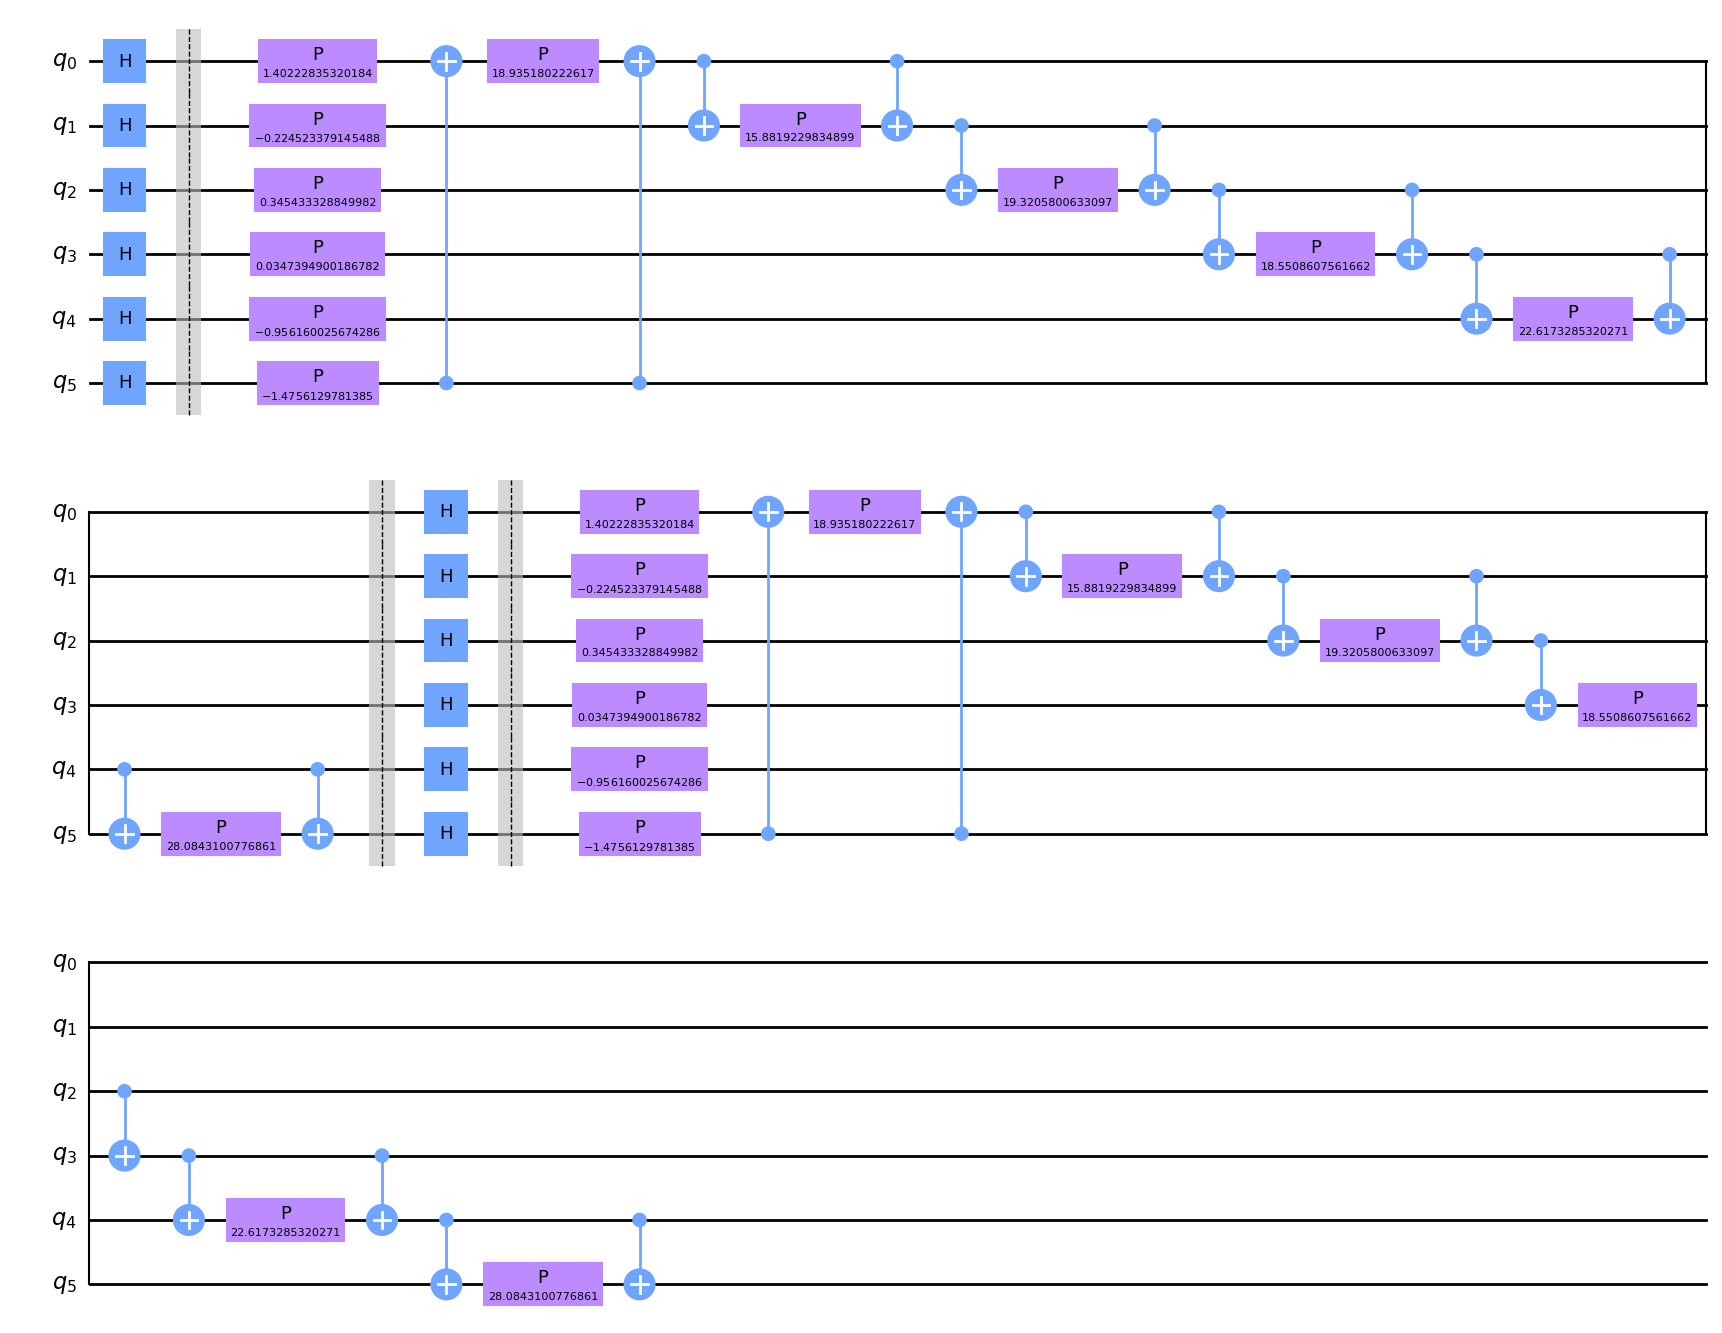

In [8]:
encode_map = ZZFeatureMap(feature_dimension=6, reps=2, entanglement='circular', insert_barriers=True)
encode_circuit = encode_map.bind_parameters(sample_train[0])
encode_circuit.decompose().draw(output='mpl')

In [ ]:
from qiskit import BasicAer
zz_kernel = QuantumKernel(feature_map=encode_map, quantum_instance=BasicAer.get_backend('statevector_simulator'))

In [ ]:
# to get how many iteration for converged runs
zzcb_svc.n_iter_

In [ ]:
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')

iter_list_qm = []
score_list_qm = []
for nb_iter in range(1523):
    zzcb_svc = SVC(kernel=zz_kernel.evaluate, max_iter=nb_iter)
    zzcb_svc.fit(sample_train, label_train)
    zzcb_score = zzcb_svc.score(sample_test, label_test)
    iter_list_qm.append(nb_iter)
    score_list_qm.append(zzcb_score)
    print(f'Callable kernel classification test score: {zzcb_score}', nb_iter)

In [ ]:
plt.plot(iter_list_qm, score_list_qm)
plt.xlabel('Iterations')
plt.ylabel('Score')

# Pre-computed of Second-order Pauli-Z part

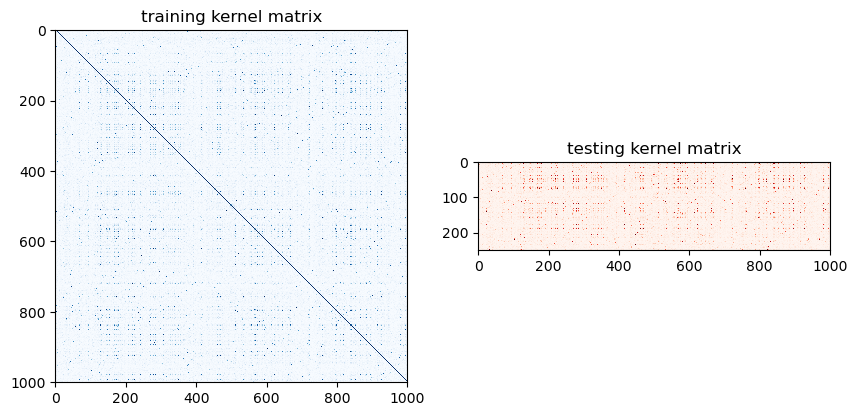

In [9]:
matrix_train = zz_kernel.evaluate(x_vec=sample_train)
matrix_test = zz_kernel.evaluate(x_vec=sample_test, y_vec=sample_train)

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(np.asmatrix(matrix_train),
              interpolation='nearest', origin='upper', cmap='Blues')
axs[0].set_title("training kernel matrix")
axs[1].imshow(np.asmatrix(matrix_test),
              interpolation='nearest', origin='upper', cmap='Reds')
axs[1].set_title("testing kernel matrix")
plt.show()

Text(0, 0.5, 'Score')

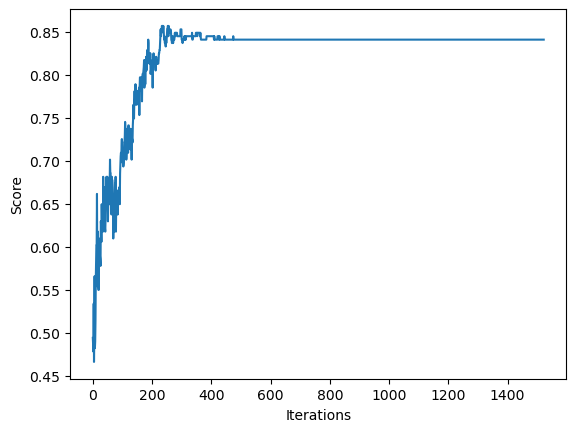

In [11]:
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')

iter_list_precomputed = []
score_list_precomputed = []
for nb_iter in range(1523):
    zzpc_svc = SVC(kernel='precomputed', max_iter=nb_iter)
    zzpc_svc.fit(matrix_train, label_train)
    zzpc_score = zzpc_svc.score(matrix_test, label_test)
    iter_list_precomputed.append(nb_iter)
    score_list_precomputed.append(zzpc_score)
    # print(f'Precomputed kernel classification test score: {zzpc_score}')
plt.plot(iter_list_precomputed, score_list_precomputed)
plt.xlabel('Iterations')
plt.ylabel('Score')

# 1. Testing parameters of second order Pauli-Z part

In [44]:
# Generate parameter list
pca_list = []
entanglement_list = []
reps_list = []
for pca_tmp in [4, 6, 8, 10]:
    for entanglement_tmp in ['linear', 'circular']:
        for reps_tmp in [2, 3]:
            pca_list.append(pca_tmp)
            entanglement_list.append(entanglement_tmp)
            reps_list.append(reps_tmp)

In [ ]:
from qiskit import BasicAer
from warnings import filterwarnings
filterwarnings('ignore')

iter_list_precomputed = []
score_list_precomputed = []
score_train_list_precomputed = []
for para_inx in range(len(pca_list)):
    print(pca_list[para_inx], entanglement_list[para_inx], reps_list[para_inx])
    # Split dataset
    sample_train, sample_test, label_train, label_test = train_test_split(X, y, test_size=0.2, random_state=22)

    # Reduce dimensions
    n_dim = pca_list[para_inx]
    pca = PCA(n_components=n_dim).fit(sample_train)
    sample_train = pca.transform(sample_train)
    sample_test = pca.transform(sample_test)

    # Normalise
    std_scale = StandardScaler().fit(sample_train)
    sample_train = std_scale.transform(sample_train)
    sample_test = std_scale.transform(sample_test)

    # Scale
    samples = np.append(sample_train, sample_test, axis=0)
    minmax_scale = MinMaxScaler((-1, 1)).fit(samples)
    sample_train = minmax_scale.transform(sample_train)
    sample_test = minmax_scale.transform(sample_test)
    
    # setup of kernel
    encode_map = ZZFeatureMap(feature_dimension=pca_list[para_inx], reps=reps_list[para_inx], entanglement=entanglement_list[para_inx], insert_barriers=True)
    zz_kernel = QuantumKernel(feature_map=encode_map, quantum_instance=BasicAer.get_backend('statevector_simulator'))
    
    # pre-compute
    matrix_train = zz_kernel.evaluate(x_vec=sample_train)
    matrix_test = zz_kernel.evaluate(x_vec=sample_test, y_vec=sample_train)
    
    # Get max of iteration needed
    zzpc_svc = SVC(kernel='precomputed', max_iter=-1)
    zzpc_svc.fit(matrix_train, label_train)
    max_iter = zzpc_svc.n_iter_[0] + 100
    print('Take max_iter as ', max_iter)
    print('Score of validation', zzpc_svc.score(matrix_test, label_test))
    print('Score of training', zzpc_svc.score(matrix_train, label_train))
    
    # loop over iteration from 0 to max_iteration
    iter_list_precomputed_local = []
    score_list_precomputed_local = []
    score_train_list_precomputed_local = []
    for nb_iter in range(max_iter):
        zzpc_svc = SVC(kernel='precomputed', max_iter=nb_iter)
        zzpc_svc.fit(matrix_train, label_train)
        zzpc_score = zzpc_svc.score(matrix_test, label_test)
        zzpc_score_train = zzpc_svc.score(matrix_train, label_train)
        iter_list_precomputed_local.append(nb_iter)
        score_list_precomputed_local.append(zzpc_score)
        score_train_list_precomputed_local.append(zzpc_score_train)
        # print(f'Precomputed kernel classification test score: {zzpc_score}')
    iter_list_precomputed.append(iter_list_precomputed_local)
    score_list_precomputed.append(score_list_precomputed_local)
    score_train_list_precomputed.append(score_train_list_precomputed_local)

In [92]:
# save results to file
if not os.path.exists('res/zz_1.npy'):
    with open('res/zz_1.npy', 'wb') as f:
        np.save(f, np.array(pca_list))
        np.save(f, np.array(entanglement_list))
        np.save(f, np.array(reps_list))
        np.save(f, np.array(iter_list_precomputed))
        np.save(f, np.array(score_list_precomputed))
        np.save(f, np.array(score_train_list_precomputed))

In [10]:
with open('res/zz_1.npy', 'rb') as f:
    pca_list = np.load(f)
    entanglement_list = np.load(f)
    reps_list = np.load(f)
    iter_list_precomputed = np.load(f, allow_pickle=True)
    score_list_precomputed = np.load(f, allow_pickle=True)
    score_train_list_precomputed = np.load(f, allow_pickle=True)

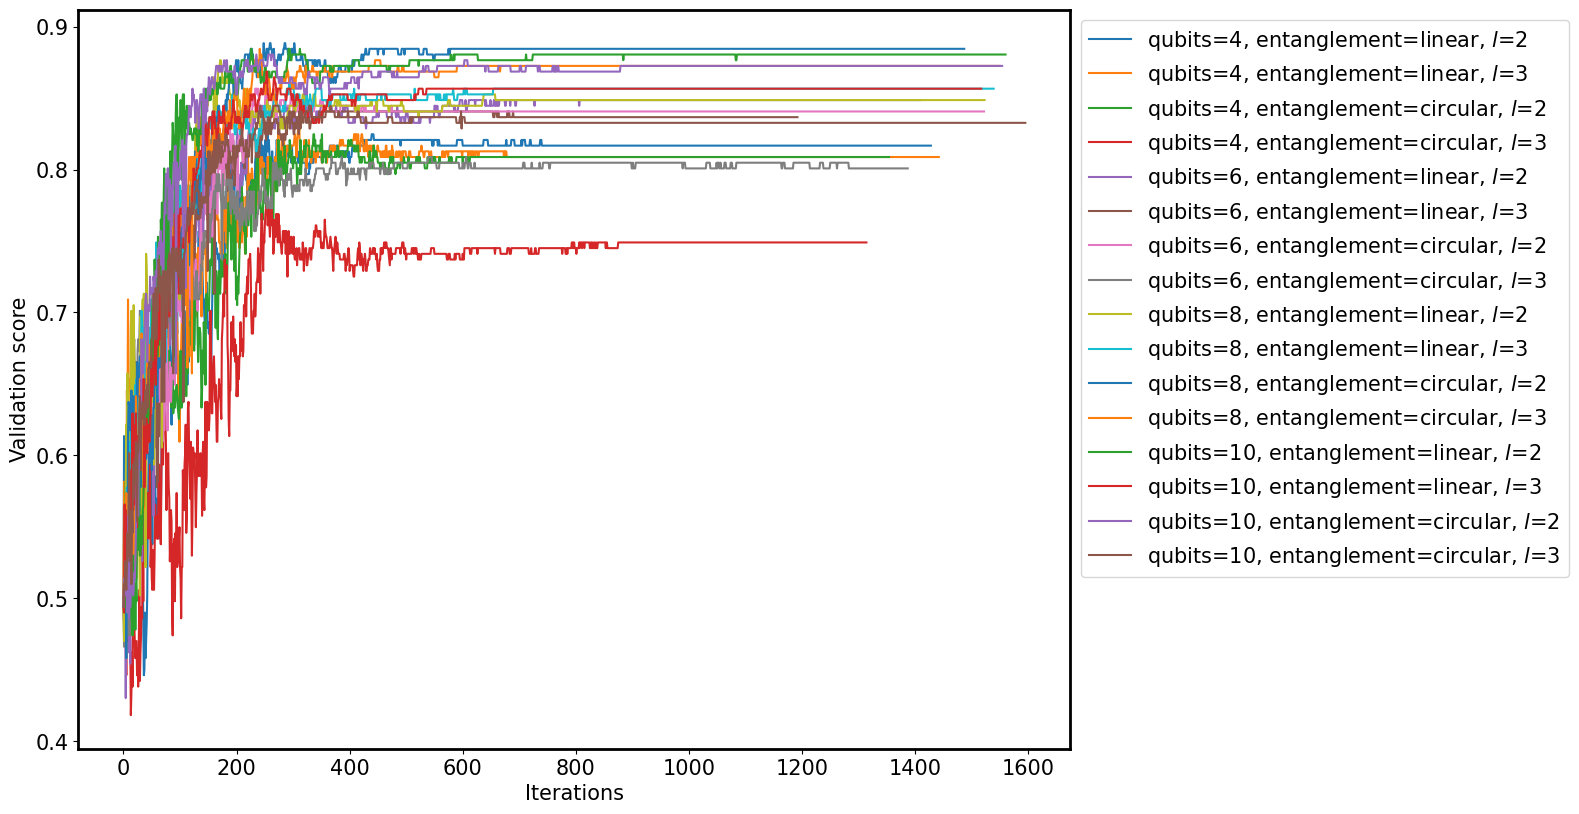

In [11]:
# plot iteration vs validation_score (all)
plt.figure(figsize=[12.8, 9.6])
for para_inx in range(len(pca_list)):
    label_str = 'qubits='+str(pca_list[para_inx]) + ', entanglement='+entanglement_list[para_inx] + ', $\it{l}$='+str(reps_list[para_inx])
    plt.plot(iter_list_precomputed[para_inx], score_list_precomputed[para_inx], label=label_str)

#plt.plot(iter_list_precomputed, score_list_precomputed, label='Second-order Pauli-Z')

plt.xlabel('Iterations')
plt.ylabel('Validation score')
plt.legend(bbox_to_anchor=(1, 1))

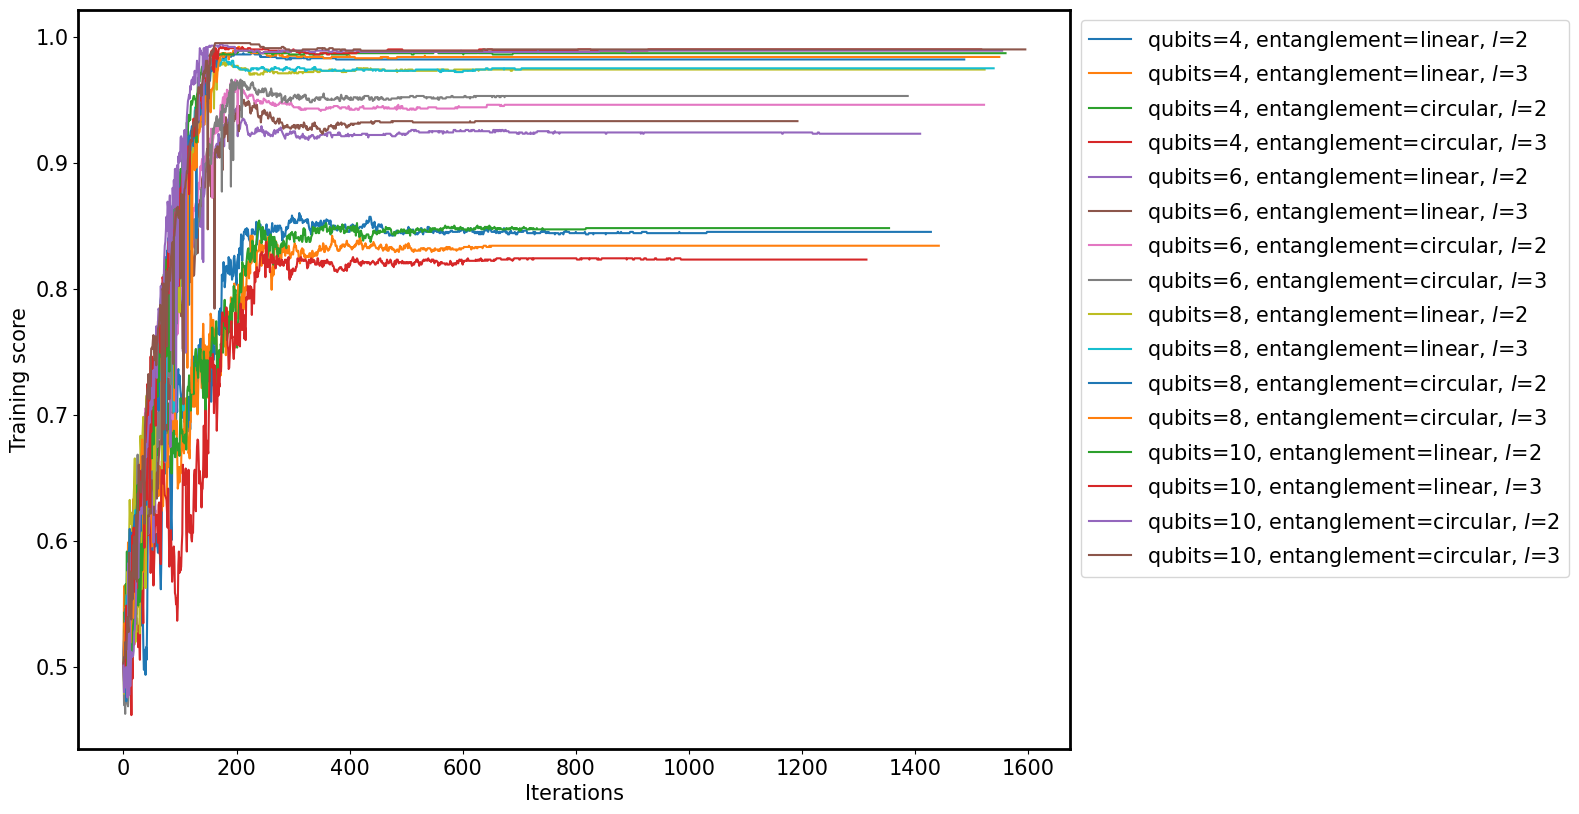

In [12]:
# plot iteration vs training_score (all)
plt.figure(figsize=[12.8, 9.6])
for para_inx in range(len(pca_list)):
    label_str = 'qubits='+str(pca_list[para_inx]) + ', entanglement='+entanglement_list[para_inx] + ', $\it{l}$='+str(reps_list[para_inx])
    plt.plot(iter_list_precomputed[para_inx], score_train_list_precomputed[para_inx], label=label_str)

#plt.plot(iter_list_precomputed, score_list_precomputed, label='Second-order Pauli-Z')

plt.xlabel('Iterations')
plt.ylabel('Training score')
plt.legend(bbox_to_anchor=(1, 1))

qubits=4, entanglement=linear, $\it{l}$=2 0.8309439564419645
qubits=4, entanglement=linear, $\it{l}$=3 0.8214653872024389
qubits=4, entanglement=circular, $\it{l}$=2 0.828458394195446
qubits=4, entanglement=circular, $\it{l}$=3 0.786090403620284
qubits=6, entanglement=linear, $\it{l}$=2 0.885841250383083
qubits=6, entanglement=linear, $\it{l}$=3 0.8848601597605582
qubits=6, entanglement=circular, $\it{l}$=2 0.8933456981265746
qubits=6, entanglement=circular, $\it{l}$=3 0.8769218828979786
qubits=8, entanglement=linear, $\it{l}$=2 0.9113157758576085
qubits=8, entanglement=linear, $\it{l}$=3 0.9157993401021289
qubits=8, entanglement=circular, $\it{l}$=2 0.9332400667062022
qubits=8, entanglement=circular, $\it{l}$=3 0.9282629720876733
qubits=10, entanglement=linear, $\it{l}$=2 0.9337455373311947
qubits=10, entanglement=linear, $\it{l}$=3 0.9232918475946365
qubits=10, entanglement=circular, $\it{l}$=2 0.9307604745851759
qubits=10, entanglement=circular, $\it{l}$=3 0.9113396563595767


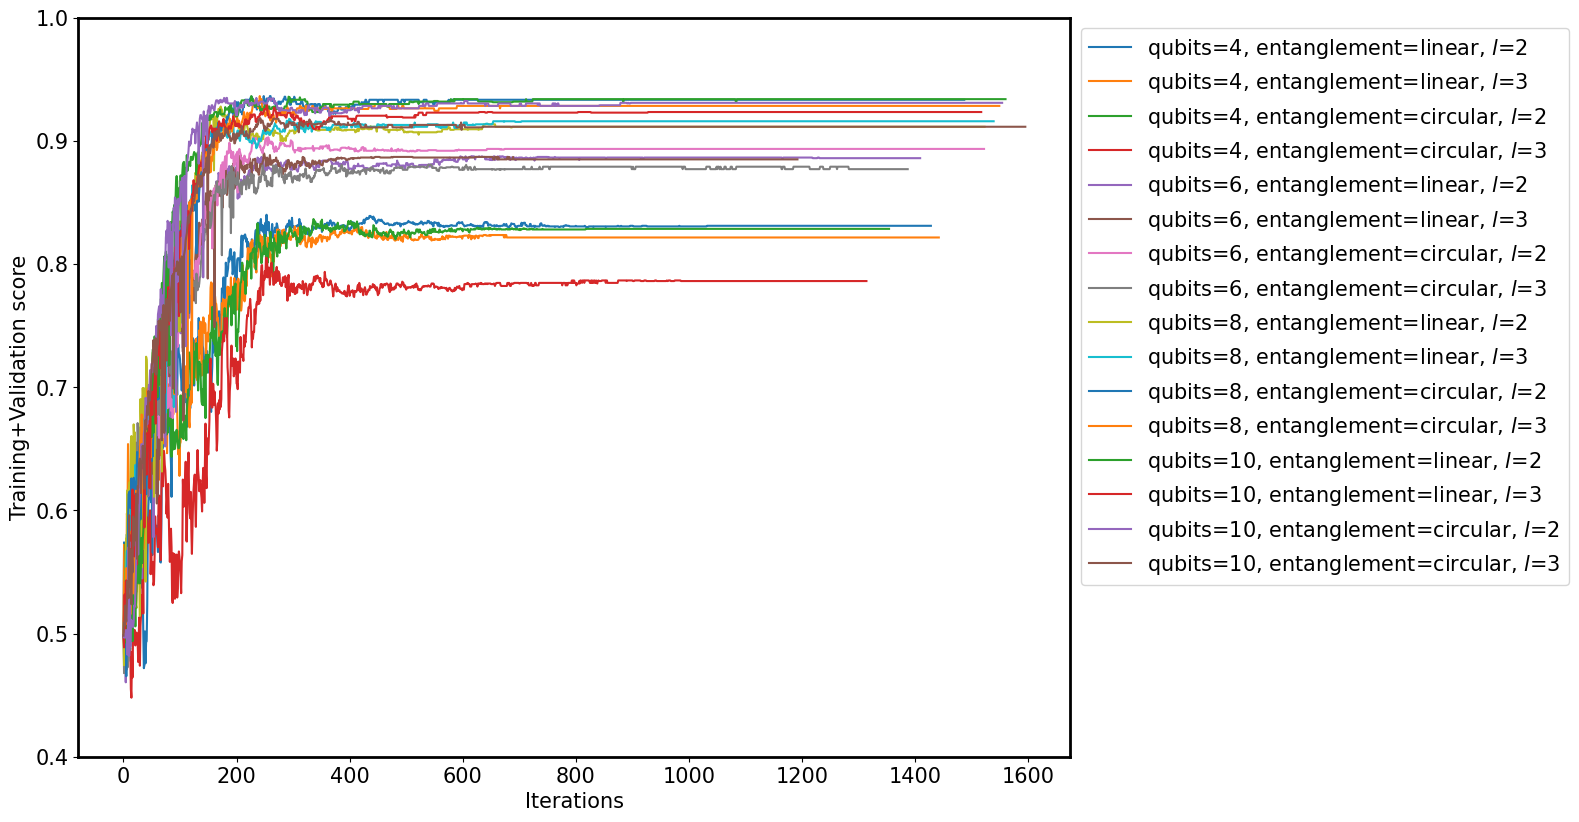

In [13]:
# plot iteration vs training_score + validation_score (all)
plt.figure(figsize=[12.8, 9.6])
score_total = []
for para_inx in range(len(pca_list)):
    label_str = 'qubits='+str(pca_list[para_inx]) + ', entanglement='+entanglement_list[para_inx] + ', $\it{l}$='+str(reps_list[para_inx])
    x = iter_list_precomputed[para_inx] 
    y = (np.array(score_train_list_precomputed[para_inx]) + np.array(score_list_precomputed[para_inx])) / 2
    plt.plot(x, y, label=label_str)
    print(label_str, y[-1])
    score_total.append(y[-1])

#plt.plot(iter_list_precomputed, score_list_precomputed, label='Second-order Pauli-Z')

plt.xlabel('Iterations')
plt.ylabel('Training+Validation score')
plt.ylim([0.4, 1])
plt.legend(bbox_to_anchor=(1, 1))

In [15]:
# convert data to pandas
import pandas as pd
df = pd.DataFrame(list(zip(pca_list, entanglement_list, reps_list, iter_list_precomputed, 
                           score_list_precomputed, score_train_list_precomputed,
                           score_total)),
                 columns =['qubits', 'entanglement', 'reps', 'iterations', 
                           'score_validation', 'score_train', 'score_total'])

qubits= 10
entanblement= linear
repetitions= 2


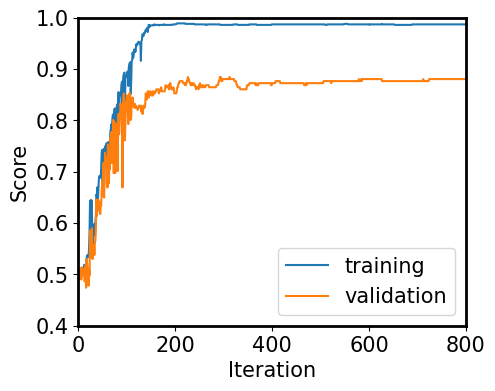

In [16]:
# Plot iteration vs trainin/validation score with best performance
plt.figure(figsize=(5,4))
best_df = df[df['score_total'] == df.score_total.max()]
x = best_df.iterations.values[0]
trainig_score = best_df.score_train.values[0]
validation_score = best_df.score_validation.values[0]
print('qubits=', best_df.qubits.values[0])
print('entanblement=', best_df.entanglement.values[0])
print('repetitions=', best_df.reps.values[0])
plt.plot(x, trainig_score, label='training')
plt.plot(x, validation_score, label='validation')
plt.xlabel('Iteration')
plt.ylabel('Score')
plt.xlim([0, 800])
plt.ylim([0.4, 1])
plt.legend()
plt.savefig('figs/Fig_2.error_vs_iteration.pdf')

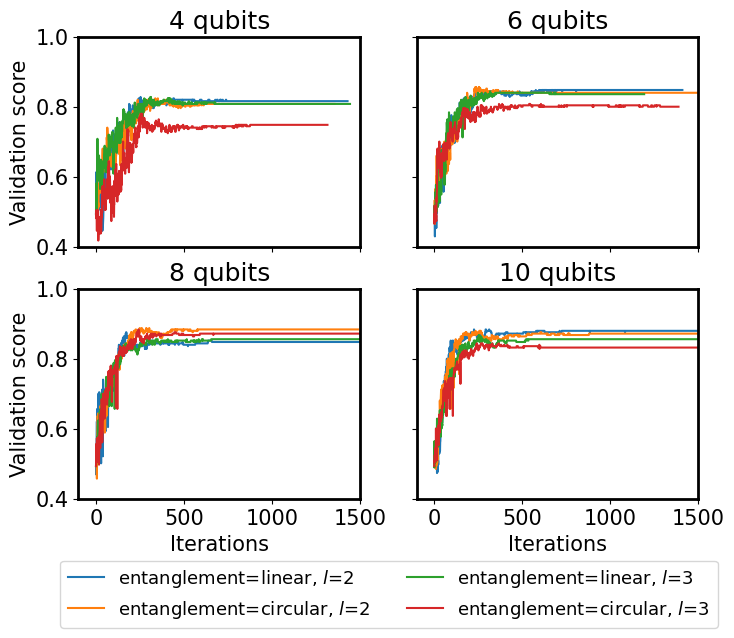

In [17]:
# Plot iteration vs score_validation (separated by nb_qubits)
fig, axs = plt.subplots(2, 2, figsize=[8, 6])
plot_pos_x = [0, 0, 1, 1]
plot_pos_y = [0, 1, 0, 1]
for qubits_id, qubits in enumerate([4, 6, 8, 10]):
    for reps in [2, 3]:
        for entanglement in ['linear', 'circular']:
            df_new = df[(df['qubits'] == qubits) & (df['entanglement'] == entanglement) & (df['reps'] == reps)]
            x = df_new['iterations'].values[0]
            y = df_new['score_validation'].values[0]
            label_str = 'entanglement='+entanglement + ', $\it{l}$='+str(reps)
            axs[plot_pos_x[qubits_id], plot_pos_y[qubits_id]].plot(x, y, label=label_str)
            axs[plot_pos_x[qubits_id], plot_pos_y[qubits_id]].set_title(str(qubits) + ' qubits')
            axs[plot_pos_x[qubits_id], plot_pos_y[qubits_id]].set_xlim([-100, 1500])
            axs[plot_pos_x[qubits_id], plot_pos_y[qubits_id]].set_ylim([0.4, 1])            
for ax in axs.flat:
    ax.set(xlabel='Iterations', ylabel='Validation score')
# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
lgd = axs[1,1].legend(bbox_to_anchor=(1.1, -0.25), ncol=2, prop={'size': 13})
fig.savefig('figs/Figure_supp_1.score_vs_iteration_validation.pdf', bbox_extra_artists=(lgd,), bbox_inches='tight')

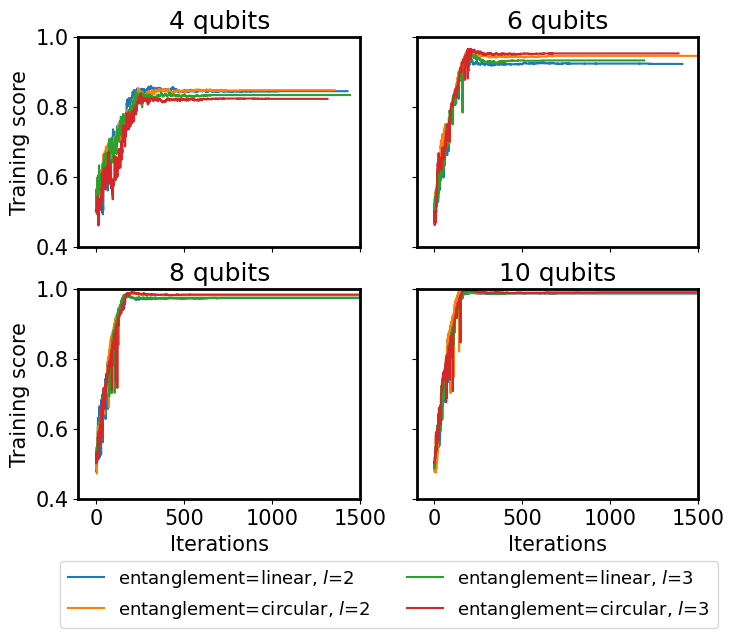

In [18]:
# Plot iteration vs score_training (separated by nb_qubits)
fig, axs = plt.subplots(2, 2, figsize=[8, 6])
plot_pos_x = [0, 0, 1, 1]
plot_pos_y = [0, 1, 0, 1]
for qubits_id, qubits in enumerate([4, 6, 8, 10]):
    for reps in [2, 3]:
        for entanglement in ['linear', 'circular']:
            df_new = df[(df['qubits'] == qubits) & (df['entanglement'] == entanglement) & (df['reps'] == reps)]
            x = df_new['iterations'].values[0]
            y = df_new['score_train'].values[0]
            label_str = 'entanglement='+entanglement + ', $\it{l}$='+str(reps)
            axs[plot_pos_x[qubits_id], plot_pos_y[qubits_id]].plot(x, y, label=label_str)
            axs[plot_pos_x[qubits_id], plot_pos_y[qubits_id]].set_title(str(qubits) + ' qubits')
            axs[plot_pos_x[qubits_id], plot_pos_y[qubits_id]].set_xlim([-100, 1500])
            axs[plot_pos_x[qubits_id], plot_pos_y[qubits_id]].set_ylim([0.4, 1])            
for ax in axs.flat:
    ax.set(xlabel='Iterations', ylabel='Training score')
# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
lgd = axs[1,1].legend(bbox_to_anchor=(1.1, -0.25), ncol=2, prop={'size': 13})
fig.savefig('figs/Figure_supp_1.score_vs_iteration_training.pdf', bbox_extra_artists=(lgd,), bbox_inches='tight')

# 1.2 Testing features of second order Pauli-Z part, rep=1

In [56]:
# Generate parameter list
pca_list = []
entanglement_list = []
reps_list = []
classical_kernels = ['linear', 'poly', 'rbf', 'sigmoid']
classical_kernels_text = ['Linear', 'Poly', 'RBF', 'Sigmoid']
for pca_tmp in [2, 4, 6, 8, 10, 12, 15]:
    for entanglement_tmp in ['circular']:
        for reps_tmp in [1]:
            pca_list.append(pca_tmp)
            entanglement_list.append(entanglement_tmp)
            reps_list.append(reps_tmp)

In [ ]:
score_list_precomputed = []
score_train_list_precomputed = []
score_list_classical = []
score_train_list_classical = []
nb_rand_sampling = 300

for para_inx in range(len(pca_list)):
    print(pca_list[para_inx], entanglement_list[para_inx], reps_list[para_inx])
    # Randomly sample dataset
    score_list_precomputed_local = []
    score_train_list_precomputed_local = []
    score_list_classical_local = []
    score_train_list_classical_local = []
    for attemp_i in range(nb_rand_sampling):
        # Load digits dataset
        data=np.genfromtxt('alloy-property-avg.csv',delimiter=",",skip_header=1)

        # Split as y for phase, X for other properties
        X,y=[],[]
        for i in range(len(data)):
            X.append(data[i][0:-1]), y.append(data[i][-1])

        # renormlaised all variables in X
        max_arr=np.max(X,axis=0)
        X=X/max_arr

        # Split dataset
        sample_train, sample_test, label_train, label_test = train_test_split(X, y, test_size=0.2, random_state=22+attemp_i)

        # Reduce dimensions
        n_dim = pca_list[para_inx]
        pca = PCA(n_components=n_dim).fit(sample_train)
        sample_train = pca.transform(sample_train)
        sample_test = pca.transform(sample_test)

        # Normalise
        std_scale = StandardScaler().fit(sample_train)
        sample_train = std_scale.transform(sample_train)
        sample_test = std_scale.transform(sample_test)

        # Scale
        samples = np.append(sample_train, sample_test, axis=0)
        minmax_scale = MinMaxScaler((-1, 1)).fit(samples)
        sample_train = minmax_scale.transform(sample_train)
        sample_test = minmax_scale.transform(sample_test)

        # setup of kernel
        encode_map = ZZFeatureMap(feature_dimension=pca_list[para_inx], reps=reps_list[para_inx], entanglement=entanglement_list[para_inx], insert_barriers=True)
        zz_kernel = QuantumKernel(feature_map=encode_map, quantum_instance=BasicAer.get_backend('statevector_simulator'))

        # pre-compute
        matrix_train = zz_kernel.evaluate(x_vec=sample_train)
        matrix_test = zz_kernel.evaluate(x_vec=sample_test, y_vec=sample_train)

        # Get max of iteration needed
        zzpc_svc = SVC(kernel='precomputed', max_iter=-1)
        zzpc_svc.fit(matrix_train, label_train)
        # max_iter = zzpc_svc.n_iter_[0] + 100
        train_score = zzpc_svc.score(matrix_train, label_train)
        validation_score = zzpc_svc.score(matrix_test, label_test)
        score_list_precomputed_local.append(validation_score)
        score_train_list_precomputed_local.append(train_score)
        print('Attempt ', attemp_i)
        # print('Take max_iter as ', max_iter)
        print('Score of validation', validation_score)
        print('Score of training', train_score)

        # Get score for classical kernals
        score_list_classical_local_local = []
        score_train_list_classical_local_local = []
        for kernel_idx, kernel in enumerate(classical_kernels):
            classical_svc = SVC(kernel=kernel, max_iter=-1)
            classical_svc.fit(sample_train, label_train)
            classical_score = classical_svc.score(sample_test, label_test)
            classical_train_score = classical_svc.score(sample_train, label_train)
            score_list_classical_local_local.append(classical_score)
            score_train_list_classical_local_local.append(classical_train_score)
        print('Score of validation (classical)', score_list_classical_local_local)
        print('Score of training (classical)', score_train_list_classical_local_local)
        score_list_classical_local.append(score_list_classical_local_local)
        score_train_list_classical_local.append(score_train_list_classical_local_local)
        
    score_list_precomputed.append(score_list_precomputed_local)
    score_train_list_precomputed.append(score_train_list_precomputed_local)
    score_list_classical.append(score_list_classical_local)
    score_train_list_classical.append(score_train_list_classical_local)

In [8]:
# New read of results file from run_1.2_split.sh
noise_list = []
pca_list = []
entanglement_list = []
reps_list = []
noise_list = []
score_list_precomputed = []
score_train_list_precomputed = []
score_list_classical = []
score_train_list_classical = []
classical_kernels = ['linear', 'poly', 'rbf', 'sigmoid']
classical_kernels_text = ['Linear', 'Poly', 'RBF', 'Sigmoid']
for file_id in [2, 4, 6, 8, 10, 12, 15]:
    filename = 'res/zz_1.2_' + str(file_id) + '.npy'
    with open(filename, 'rb') as f:
        pca_list.append(np.load(f))
        entanglement_list.append(np.load(f))
        reps_list.append(np.load(f))
        score_list_precomputed.append(np.load(f, allow_pickle=True))
        score_train_list_precomputed.append(np.load(f, allow_pickle=True))
        score_list_classical.append(np.load(f, allow_pickle=True))
        score_train_list_classical.append(np.load(f, allow_pickle=True))

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


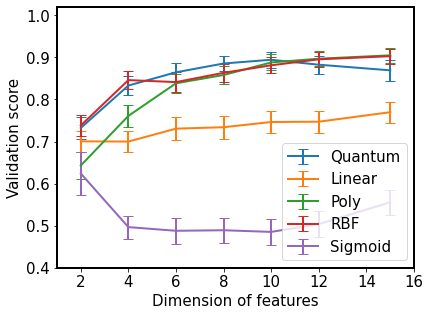

In [6]:
from matplotlib.ticker import MaxNLocator
import pandas as pd

to_csv_feature = []
to_csv_kernel = []
to_csv_mean = []
to_csv_std = []

quamtum_y_mean = []
quamtum_y_std = []
classical_y_mean = []
classical_y_std = []
score_list_classical = np.array(score_list_classical)
for pca_inx, pca in enumerate(pca_list):
    full_data = score_list_precomputed[pca_inx]
    quamtum_y_mean.append(full_data.mean())
    quamtum_y_std.append(full_data.std())
    classical_y_mean_local = []
    classical_y_std_local = []
    #print('Feature: ', pca_list[pca_inx], ', Quantum mean, ', quamtum_y_mean[-1], ', Quantum std, ', quamtum_y_std[-1])
    to_csv_feature.append(pca_list[pca_inx][0])
    to_csv_kernel.append('Quantum')
    to_csv_mean.append(quamtum_y_mean[-1])
    to_csv_std.append(quamtum_y_std[-1])
    for kernel_idx, kernel in enumerate(classical_kernels):
        full_data = np.array(score_list_classical[pca_inx])[:, kernel_idx]
        #full_data = score_list_classical[dsize_inx, :, kernel_idx]
        classical_y_mean_local.append(full_data.mean())
        classical_y_std_local.append(full_data.std())
        to_csv_feature.append(pca_list[pca_inx][0])
        to_csv_kernel.append(classical_kernels_text[kernel_idx])
        to_csv_mean.append(classical_y_mean_local[-1])
        to_csv_std.append(classical_y_std_local[-1])
    classical_y_mean.append(classical_y_mean_local)
    classical_y_std.append(classical_y_std_local)
classical_y_mean = np.array(classical_y_mean)
classical_y_std = np.array(classical_y_std)

df = pd.DataFrame(list(zip(to_csv_feature, to_csv_kernel, to_csv_mean, to_csv_std)),
               columns =['Qubits', 'Kernel', 'Score_mean', 'Score_std'])
df.to_csv('Figure_3.circular_8qubits_1_pca_test_validation.csv', index=False)

ax = plt.figure(figsize=[6.4, 4.8]).gca()
plt.errorbar(pca_list, quamtum_y_mean, yerr=quamtum_y_std, label='Quantum', markersize=8, capsize=5, linewidth=2)
for kernel_idx, kernel in enumerate(classical_kernels_text):
    plt.errorbar(pca_list, classical_y_mean[:, kernel_idx], yerr=classical_y_std[:, kernel_idx], label=kernel, markersize=8, capsize=5, linewidth=2)
    #for pca_inx, pca in enumerate(pca_list):
        #print('Feature: ', pca, kernel, 'mean, ', classical_y_mean[pca_inx, kernel_idx], ', std, ', classical_y_std[pca_inx, kernel_idx])

ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.xlabel('Dimension of features')
plt.ylabel('Validation score')
plt.legend()
plt.xlim([1, 16])
plt.ylim([0.4, 1.02])
#plt.xticks([0, 300, 600, 900, 1200])
#plt.xticks(total_data_size_list)
plt.savefig('figs/Figure_3.circular_8qubits_1_pca_test_validation.pdf', bbox_inches='tight', pad_inches=0)

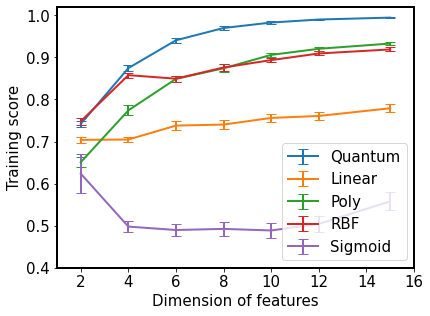

In [7]:
from matplotlib.ticker import MaxNLocator
import pandas as pd

to_csv_feature = []
to_csv_kernel = []
to_csv_mean = []
to_csv_std = []

quamtum_y_mean = []
quamtum_y_std = []
classical_y_mean = []
classical_y_std = []
score_train_list_classical = np.array(score_train_list_classical)
for pca_inx, pca in enumerate(pca_list):
    full_data = score_train_list_precomputed[pca_inx]
    quamtum_y_mean.append(full_data.mean())
    quamtum_y_std.append(full_data.std())
    classical_y_mean_local = []
    classical_y_std_local = []
    # print('Feature: ', pca_list[pca_inx], ', Quantum mean, ', quamtum_y_mean[-1], ', Quantum std, ', quamtum_y_std[-1])
    to_csv_feature.append(pca_list[pca_inx][0])
    to_csv_kernel.append('Quantum')
    to_csv_mean.append(quamtum_y_mean[-1])
    to_csv_std.append(quamtum_y_std[-1])
    for kernel_idx, kernel in enumerate(classical_kernels):
        full_data = np.array(score_train_list_classical[pca_inx])[:, kernel_idx]
        #full_data = score_list_classical[dsize_inx, :, kernel_idx]
        classical_y_mean_local.append(full_data.mean())
        classical_y_std_local.append(full_data.std())
        to_csv_feature.append(pca_list[pca_inx][0])
        to_csv_kernel.append(classical_kernels_text[kernel_idx])
        to_csv_mean.append(classical_y_mean_local[-1])
        to_csv_std.append(classical_y_std_local[-1])
    classical_y_mean.append(classical_y_mean_local)
    classical_y_std.append(classical_y_std_local)
classical_y_mean = np.array(classical_y_mean)
classical_y_std = np.array(classical_y_std)

df = pd.DataFrame(list(zip(to_csv_feature, to_csv_kernel, to_csv_mean, to_csv_std)),
               columns =['Qubits', 'Kernel', 'Score_mean', 'Score_std'])
df.to_csv('Figure_3.circular_8qubits_1_pca_test_training.csv', index=False)


ax = plt.figure(figsize=[6.4, 4.8]).gca()
plt.errorbar(pca_list, quamtum_y_mean, yerr=quamtum_y_std, label='Quantum', markersize=8, capsize=5, linewidth=2)
for kernel_idx, kernel in enumerate(classical_kernels_text):
    plt.errorbar(pca_list, classical_y_mean[:, kernel_idx], yerr=classical_y_std[:, kernel_idx], label=kernel, markersize=8, capsize=5, linewidth=2)
    #for pca_inx, pca in enumerate(pca_list):
        #print('Feature: ', pca, kernel, 'mean, ', classical_y_mean[pca_inx, kernel_idx], ', std, ', classical_y_std[pca_inx, kernel_idx])

ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.xlabel('Dimension of features')
plt.ylabel('Training score')
plt.legend()
plt.xlim([1, 16])
plt.ylim([0.4, 1.02])
#plt.xticks([0, 300, 600, 900, 1200])
#plt.xticks(total_data_size_list)
plt.savefig('figs/Figure_3.circular_8qubits_1_pca_test_training.pdf', bbox_inches='tight', pad_inches=0)

# 2. Testing parameters of second order Pauli-Z part (8 qubits and circular)

In [20]:
# Generate parameter list
pca_list = []
entanglement_list = []
reps_list = []
for pca_tmp in [8]:
    for entanglement_tmp in ['circular']:
        for reps_tmp in [1, 2, 3, 4, 5]:
            pca_list.append(pca_tmp)
            entanglement_list.append(entanglement_tmp)
            reps_list.append(reps_tmp)

In [23]:
from qiskit import BasicAer
from warnings import filterwarnings
filterwarnings('ignore')

iter_list_precomputed = []
score_list_precomputed = []
score_train_list_precomputed = []
for para_inx in range(len(pca_list)):
    print(pca_list[para_inx], entanglement_list[para_inx], reps_list[para_inx])
    # Split dataset
    sample_train, sample_test, label_train, label_test = train_test_split(X, y, test_size=0.2, random_state=22)

    # Reduce dimensions
    n_dim = pca_list[para_inx]
    pca = PCA(n_components=n_dim).fit(sample_train)
    sample_train = pca.transform(sample_train)
    sample_test = pca.transform(sample_test)

    # Normalise
    std_scale = StandardScaler().fit(sample_train)
    sample_train = std_scale.transform(sample_train)
    sample_test = std_scale.transform(sample_test)

    # Scale
    samples = np.append(sample_train, sample_test, axis=0)
    minmax_scale = MinMaxScaler((-1, 1)).fit(samples)
    sample_train = minmax_scale.transform(sample_train)
    sample_test = minmax_scale.transform(sample_test)
    
    # setup of kernel
    encode_map = ZZFeatureMap(feature_dimension=pca_list[para_inx], reps=reps_list[para_inx], entanglement=entanglement_list[para_inx], insert_barriers=True)
    zz_kernel = QuantumKernel(feature_map=encode_map, quantum_instance=BasicAer.get_backend('statevector_simulator'))
    
    # pre-compute
    matrix_train = zz_kernel.evaluate(x_vec=sample_train)
    matrix_test = zz_kernel.evaluate(x_vec=sample_test, y_vec=sample_train)
    
    # Get max of iteration needed
    zzpc_svc = SVC(kernel='precomputed', max_iter=-1)
    zzpc_svc.fit(matrix_train, label_train)
    max_iter = zzpc_svc.n_iter_[0] + 100
    print('Take max_iter as ', max_iter)
    print('Score of validation', zzpc_svc.score(matrix_test, label_test))
    print('Score of training', zzpc_svc.score(matrix_train, label_train))
    
    # loop over iteration from 0 to max_iteration
    iter_list_precomputed_local = []
    score_list_precomputed_local = []
    score_train_list_precomputed_local = []
    for nb_iter in range(max_iter):
        zzpc_svc = SVC(kernel='precomputed', max_iter=nb_iter)
        zzpc_svc.fit(matrix_train, label_train)
        zzpc_score = zzpc_svc.score(matrix_test, label_test)
        zzpc_score_train = zzpc_svc.score(matrix_train, label_train)
        iter_list_precomputed_local.append(nb_iter)
        score_list_precomputed_local.append(zzpc_score)
        score_train_list_precomputed_local.append(zzpc_score_train)
        # print(f'Precomputed kernel classification test score: {zzpc_score}')
    iter_list_precomputed.append(iter_list_precomputed_local)
    score_list_precomputed.append(score_list_precomputed_local)
    score_train_list_precomputed.append(score_train_list_precomputed_local)

8 circular 1
Take max_iter as  1385
Score of validation 0.8844621513944223
Score of training 0.9690309690309691
8 circular 2
Take max_iter as  1488
Score of validation 0.8844621513944223
Score of training 0.9820179820179821
8 circular 3
Take max_iter as  1550
Score of validation 0.8725099601593626
Score of training 0.984015984015984
8 circular 4
Take max_iter as  1454
Score of validation 0.852589641434263
Score of training 0.99000999000999
8 circular 5
Take max_iter as  1559
Score of validation 0.8047808764940239
Score of training 0.994005994005994


In [24]:
# save results to file
if not os.path.exists('res/zz_2.npy'):
    with open('res/zz_2.npy', 'wb') as f:
        np.save(f, np.array(pca_list))
        np.save(f, np.array(entanglement_list))
        np.save(f, np.array(reps_list))
        np.save(f, np.array(iter_list_precomputed))
        np.save(f, np.array(score_list_precomputed))
        np.save(f, np.array(score_train_list_precomputed))

In [21]:
with open('res/zz_2.npy', 'rb') as f:
    pca_list = np.load(f)
    entanglement_list = np.load(f)
    reps_list = np.load(f)
    iter_list_precomputed = np.load(f, allow_pickle=True)
    score_list_precomputed = np.load(f, allow_pickle=True)
    score_train_list_precomputed = np.load(f, allow_pickle=True)

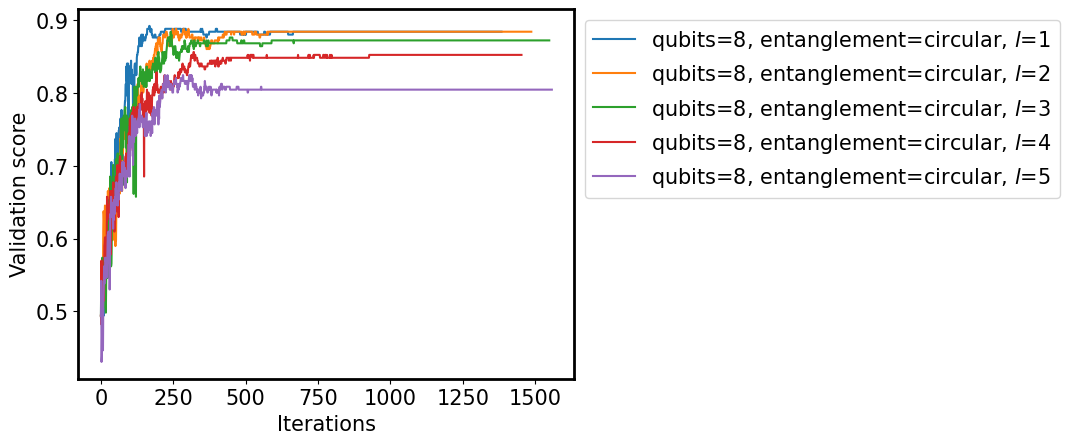

In [23]:
# plot iteration vs validation_score (all)
for para_inx in range(len(pca_list)):
    label_str = 'qubits='+str(pca_list[para_inx]) + ', entanglement='+entanglement_list[para_inx] + ', $\it{l}$='+str(reps_list[para_inx])
    plt.plot(iter_list_precomputed[para_inx], score_list_precomputed[para_inx], label=label_str)

#plt.plot(iter_list_precomputed, score_list_precomputed, label='Second-order Pauli-Z')

plt.xlabel('Iterations')
plt.ylabel('Validation score')
plt.legend(bbox_to_anchor=(1, 1))

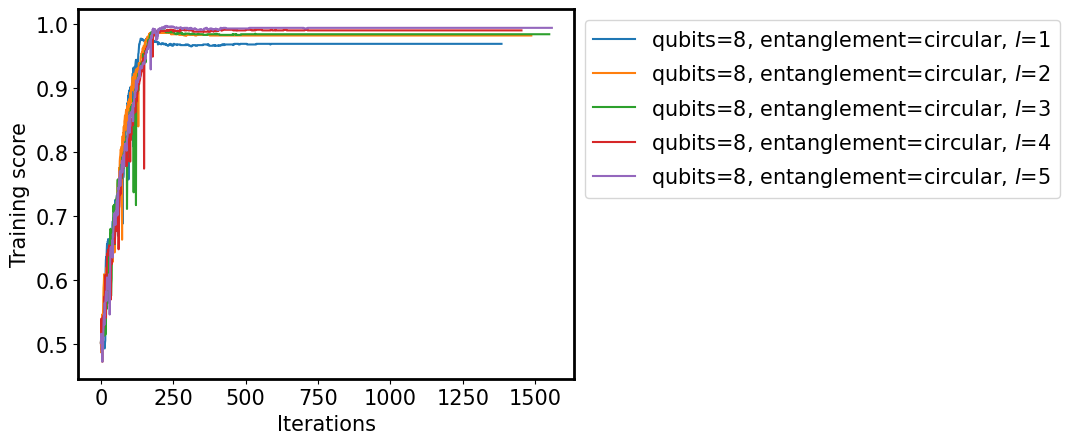

In [24]:
# plot iteration vs training_score (all)
for para_inx in range(len(pca_list)):
    label_str = 'qubits='+str(pca_list[para_inx]) + ', entanglement='+entanglement_list[para_inx] + ', $\it{l}$='+str(reps_list[para_inx])
    plt.plot(iter_list_precomputed[para_inx], score_train_list_precomputed[para_inx], label=label_str)

#plt.plot(iter_list_precomputed, score_list_precomputed, label='Second-order Pauli-Z')

plt.xlabel('Iterations')
plt.ylabel('Training score')
plt.legend(bbox_to_anchor=(1, 1))

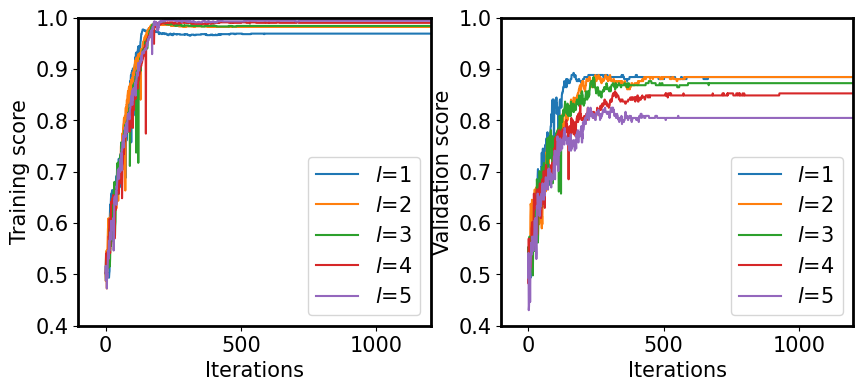

In [26]:
# Put all together
fig, axs = plt.subplots(1, 2, figsize=(10,4))
training_score_to_plot = np.zeros(5)  # we have 5 reps tested
validation_score_to_plot = np.zeros(5)  # we have 5 reps tested
for para_inx in range(len(pca_list)):
    label_str = '$\it{l}$='+str(reps_list[para_inx])
    x = iter_list_precomputed[para_inx]
    y = score_train_list_precomputed[para_inx]
    axs[0].plot(x, y, label=label_str)
    axs[0].set_xlim([-100, 1200])
    axs[0].set_ylim([0.4, 1])
    axs[0].set(xlabel='Iterations', ylabel='Training score')
    training_score_to_plot[reps_list[para_inx] - 1] = y[-1]
    
for para_inx in range(len(pca_list)):
    label_str = '$\it{l}$='+str(reps_list[para_inx])
    x = iter_list_precomputed[para_inx]
    y = score_list_precomputed[para_inx]
    axs[1].plot(x, y, label=label_str)
    axs[1].set_xlim([-100, 1200])
    axs[1].set_ylim([0.4, 1]) 
    axs[1].set(xlabel='Iterations', ylabel='Validation score')
    validation_score_to_plot[reps_list[para_inx] - 1] = y[-1]
    
axs[1].legend()
axs[0].legend()

fig.savefig('figs/Figure_supp_2.circular_8qubits.pdf', bbox_inches='tight', pad_inches=0)

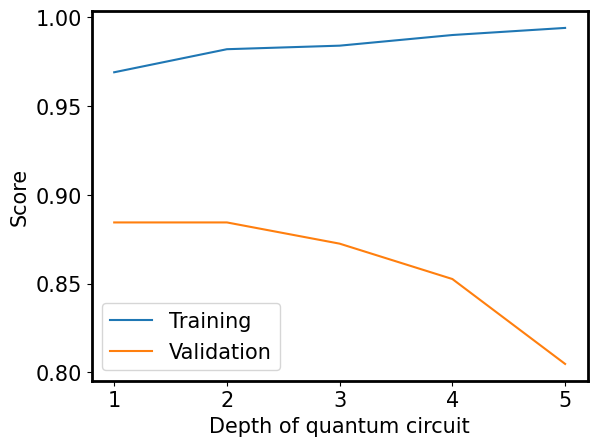

In [27]:
from matplotlib.ticker import MaxNLocator
ax = plt.figure().gca()
plt.plot([1, 2, 3, 4, 5], training_score_to_plot, label='Training')
plt.plot([1, 2, 3, 4, 5], validation_score_to_plot, label='Validation')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.xlabel('Depth of quantum circuit')
plt.ylabel('Score')
plt.legend()
plt.savefig('figs/Figure_supp_2.circular_8qubits_2.pdf')

qubits= 8
entanblement= circular
repetitions= 2


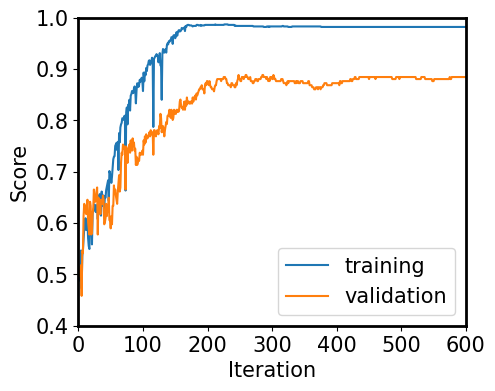

In [29]:
# Plot iteration vs trainin/validation score for 8 circular entangled
para_inx = 1
x = iter_list_precomputed[para_inx]
validation_score = score_list_precomputed[para_inx]
trainig_score = score_train_list_precomputed[para_inx]

plt.figure(figsize=(5,4))
print('qubits=', pca_list[para_inx])
print('entanblement=', entanglement_list[para_inx])
print('repetitions=', reps_list[para_inx])
plt.plot(x, trainig_score, label='training')
plt.plot(x, validation_score, label='validation')
plt.xlabel('Iteration')
plt.ylabel('Score')
plt.xlim([0, 600])
plt.ylim([0.4, 1])
plt.legend()
plt.savefig('figs/Fig_2.error_vs_iteration_8_circular.pdf')

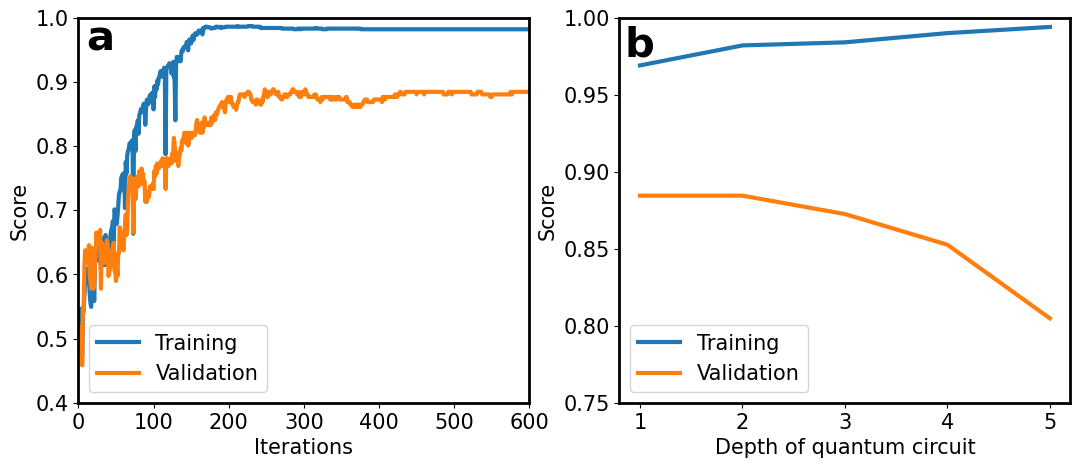

In [28]:
font = {#'family' : 'normal',
        'weight': 'normal',
        'size'   : '15'}
matplotlib.rc('font', **font)
# Combine above two figures together
fig, axs = plt.subplots(1, 2, figsize=[12.8, 5])
para_inx = 1
x = iter_list_precomputed[para_inx]
validation_score = score_list_precomputed[para_inx]
trainig_score = score_train_list_precomputed[para_inx]

axs[0].plot(x, trainig_score, label='Training', linewidth=3)
axs[0].plot(x, validation_score, label='Validation', linewidth=3)
axs[0].set(xlabel='Iterations', ylabel='Score')
axs[0].set_xlim([0, 600])
axs[0].set_ylim([0.4, 1])
axs[0].text(10, 0.95, 'a', fontsize=30, fontweight ='bold')
axs[0].legend()

training_score_to_plot = np.zeros(5)  # we have 5 reps tested
validation_score_to_plot = np.zeros(5)  # we have 5 reps tested
for para_inx in range(len(pca_list)):
    y = score_train_list_precomputed[para_inx]
    training_score_to_plot[reps_list[para_inx] - 1] = y[-1]
    y = score_list_precomputed[para_inx]
    validation_score_to_plot[reps_list[para_inx] - 1] = y[-1]
axs[1].plot([1, 2, 3, 4, 5], training_score_to_plot, label='Training', linewidth=3)
axs[1].plot([1, 2, 3, 4, 5], validation_score_to_plot, label='Validation', linewidth=3)
axs[1].xaxis.set_major_locator(MaxNLocator(integer=True))
axs[1].set(xlabel='Depth of quantum circuit', ylabel='Score')
axs[1].text(0.85, 0.975, 'b', fontsize=30, fontweight ='bold')
axs[1].set_ylim([0.75, 1])
axs[1].set_yticks([0.75, 0.8, 0.85, 0.9, 0.95, 1])
axs[1].legend()
plt.savefig('figs/Fig_2.error_vs_iteration_8_circular_combine_one_split.pdf',bbox_inches='tight', pad_inches=0)

# 2.2 Testing parameters of second order Pauli-Z part (8 qubits and circular), error bar from split of dataset

In [3]:
# Generate parameter list
pca_list = []
entanglement_list = []
reps_list = []
for pca_tmp in [8]:
    for entanglement_tmp in ['circular']:
        for reps_tmp in [1, 2, 3, 4, 5]:
            pca_list.append(pca_tmp)
            entanglement_list.append(entanglement_tmp)
            reps_list.append(reps_tmp)

In [ ]:
from qiskit import BasicAer
from warnings import filterwarnings
filterwarnings('ignore')

iter_list_precomputed = []
score_list_precomputed = []
score_train_list_precomputed = []
nb_rand_sampling = 300
for para_inx in range(len(pca_list)):
    print(pca_list[para_inx], entanglement_list[para_inx], reps_list[para_inx])
    iter_list_precomputed_local = []
    score_list_precomputed_local = []
    score_train_list_precomputed_local = []
    # Randomly sample dataset
    for attemp_i in range(nb_rand_sampling):
        # Split dataset
        sample_train, sample_test, label_train, label_test = train_test_split(X, y, test_size=0.2, random_state=22 + attemp_i)

        # Reduce dimensions
        n_dim = pca_list[para_inx]
        pca = PCA(n_components=n_dim).fit(sample_train)
        sample_train = pca.transform(sample_train)
        sample_test = pca.transform(sample_test)

        # Normalise
        std_scale = StandardScaler().fit(sample_train)
        sample_train = std_scale.transform(sample_train)
        sample_test = std_scale.transform(sample_test)

        # Scale
        samples = np.append(sample_train, sample_test, axis=0)
        minmax_scale = MinMaxScaler((-1, 1)).fit(samples)
        sample_train = minmax_scale.transform(sample_train)
        sample_test = minmax_scale.transform(sample_test)

        # setup of kernel
        encode_map = ZZFeatureMap(feature_dimension=pca_list[para_inx], reps=reps_list[para_inx], entanglement=entanglement_list[para_inx], insert_barriers=True)
        zz_kernel = QuantumKernel(feature_map=encode_map, quantum_instance=BasicAer.get_backend('statevector_simulator'))

        # pre-compute
        matrix_train = zz_kernel.evaluate(x_vec=sample_train)
        matrix_test = zz_kernel.evaluate(x_vec=sample_test, y_vec=sample_train)

        # Get max of iteration needed
        zzpc_svc = SVC(kernel='precomputed', max_iter=-1)
        zzpc_svc.fit(matrix_train, label_train)
        max_iter = zzpc_svc.n_iter_[0] + 100
        print('Attempt ', attemp_i)
        print('Take max_iter as ', max_iter)
        print('Score of validation', zzpc_svc.score(matrix_test, label_test))
        print('Score of training', zzpc_svc.score(matrix_train, label_train))

        # loop over iteration from 0 to max_iteration
        iter_list_precomputed_local_local = []
        score_list_precomputed_local_local = []
        score_train_list_precomputed_local_local = []
        for nb_iter in range(max_iter):
            zzpc_svc = SVC(kernel='precomputed', max_iter=nb_iter)
            zzpc_svc.fit(matrix_train, label_train)
            zzpc_score = zzpc_svc.score(matrix_test, label_test)
            zzpc_score_train = zzpc_svc.score(matrix_train, label_train)
            iter_list_precomputed_local_local.append(nb_iter)
            score_list_precomputed_local_local.append(zzpc_score)
            score_train_list_precomputed_local_local.append(zzpc_score_train)
            # print(f'Precomputed kernel classification test score: {zzpc_score}')
        iter_list_precomputed_local.append(iter_list_precomputed_local_local)
        score_list_precomputed_local.append(score_list_precomputed_local_local)
        score_train_list_precomputed_local.append(score_train_list_precomputed_local_local)
    iter_list_precomputed.append(iter_list_precomputed_local)
    score_list_precomputed.append(score_list_precomputed_local)
    score_train_list_precomputed.append(score_train_list_precomputed_local)

In [ ]:
# save results to file
if not os.path.exists('res/zz_2.2.npy'):
    with open('res/zz_2.2.npy', 'wb') as f:
        np.save(f, np.array(pca_list))
        np.save(f, np.array(entanglement_list))
        np.save(f, np.array(reps_list))
        np.save(f, np.array(iter_list_precomputed))
        np.save(f, np.array(score_list_precomputed))
        np.save(f, np.array(score_train_list_precomputed))

In [45]:
# ___not_used_old_read_______
with open('res/zz_2.2.npy', 'rb') as f:
    pca_list = np.load(f)
    entanglement_list = np.load(f)
    reps_list = np.load(f)
    iter_list_precomputed = np.load(f, allow_pickle=True)
    score_list_precomputed = np.load(f, allow_pickle=True)
    score_train_list_precomputed = np.load(f, allow_pickle=True)
    score_list_classical = np.load(f, allow_pickle=True)
    score_train_list_classical = np.load(f, allow_pickle=True)

In [7]:
# New read of results file from run_2.2_split.sh
pca_list = []
entanglement_list = []
reps_list = []
iter_list_precomputed = []
score_list_precomputed = []
score_train_list_precomputed = []
score_list_classical = []
score_train_list_classical = []
for file_id in [1, 2, 3, 4, 5]:
    filename = 'res/zz_2.2_' + str(file_id) + '.npy'
    with open(filename, 'rb') as f:
        pca_list.append(np.load(f))
        entanglement_list.append(np.load(f))
        reps_list.append(np.load(f))
        iter_list_precomputed.append(np.load(f, allow_pickle=True))
        score_list_precomputed.append(np.load(f, allow_pickle=True))
        score_train_list_precomputed.append(np.load(f, allow_pickle=True))
        score_list_classical.append(np.load(f, allow_pickle=True))
        score_train_list_classical.append(np.load(f, allow_pickle=True))

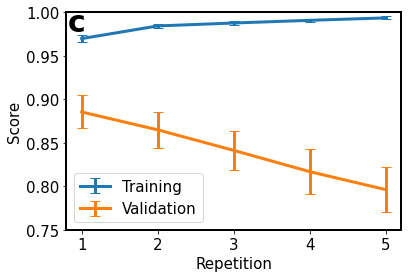

In [8]:
from matplotlib.ticker import MaxNLocator

training_score_to_plot = []
validation_score_to_plot =[]
training_score_to_plot_std = []
validation_score_to_plot_std =[]

for rep_inx, rep in enumerate([1, 2, 3, 4, 5]):
    tmp_data_train = score_train_list_precomputed[rep_inx]
    tmp_data = score_list_precomputed[rep_inx]
    train_tmp = []
    tmp = []
    for abc_inx in range(len(tmp_data_train)):
        tmp_data_train_local = tmp_data_train[abc_inx]
        train_tmp.append(tmp_data_train_local[-1])
        tmp_data_local = tmp_data[abc_inx]
        tmp.append(tmp_data_local[-1])
    training_score_to_plot.append(np.mean(train_tmp))
    training_score_to_plot_std.append(np.std(train_tmp))
    validation_score_to_plot.append(np.mean(tmp))
    validation_score_to_plot_std.append(np.std(tmp))

ax = plt.figure().gca()
plt.errorbar([1, 2, 3, 4, 5], training_score_to_plot, yerr=training_score_to_plot_std, label='Training', markersize=8, capsize=5, linewidth=3)
plt.errorbar([1, 2, 3, 4, 5], validation_score_to_plot, yerr=validation_score_to_plot_std, label='Validation', markersize=8, capsize=5, linewidth=3)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.xlabel('Repetition')
plt.ylabel('Score')
plt.ylim([0.75, 1])
plt.text(0.82, 0.978, 'c', fontsize=30, fontweight ='bold')
plt.legend()
plt.savefig('figs/Figure_supp_2.circular_8qubits_2.2.pdf',bbox_inches='tight', pad_inches=0)

# 2.3 Figure 2 combine results from 2 (rep=2) and 2.2

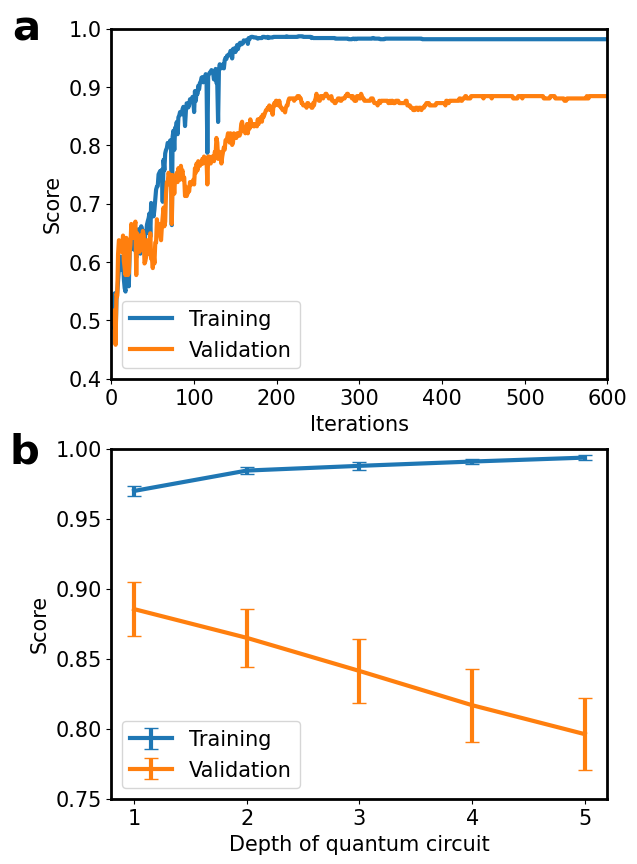

In [8]:
from matplotlib.ticker import MaxNLocator

## Figure left: score vs iterations
# Read res
with open('res/zz_2.npy', 'rb') as f:
    pca_list = np.load(f)
    entanglement_list = np.load(f)
    reps_list = np.load(f)
    iter_list_precomputed = np.load(f, allow_pickle=True)
    score_list_precomputed = np.load(f, allow_pickle=True)
    score_train_list_precomputed = np.load(f, allow_pickle=True)
# Plot figure
fig, axs = plt.subplots(2, 1, figsize=[6.4, 10])
para_inx = 1  # corresponding to l=2
x = iter_list_precomputed[para_inx]
validation_score = score_list_precomputed[para_inx]
trainig_score = score_train_list_precomputed[para_inx]

axs[0].plot(x, trainig_score, label='Training', linewidth=3)
axs[0].plot(x, validation_score, label='Validation', linewidth=3)
axs[0].set(xlabel='Iterations', ylabel='Score')
axs[0].set_xlim([0, 600])
axs[0].set_ylim([0.4, 1])
axs[0].text(-120, 0.98, 'a', fontsize=30, fontweight ='bold')
axs[0].legend()



## Figure right: repetition vs score
# Read res
pca_list = []
entanglement_list = []
reps_list = []
iter_list_precomputed = []
score_list_precomputed = []
score_train_list_precomputed = []
score_list_classical = []
score_train_list_classical = []
for file_id in [1, 2, 3, 4, 5]:
    filename = 'res/zz_2.2_' + str(file_id) + '.npy'
    with open(filename, 'rb') as f:
        pca_list.append(np.load(f))
        entanglement_list.append(np.load(f))
        reps_list.append(np.load(f))
        iter_list_precomputed.append(np.load(f, allow_pickle=True))
        score_list_precomputed.append(np.load(f, allow_pickle=True))
        score_train_list_precomputed.append(np.load(f, allow_pickle=True))
        score_list_classical.append(np.load(f, allow_pickle=True))
        score_train_list_classical.append(np.load(f, allow_pickle=True))
training_score_to_plot = []
validation_score_to_plot =[]
training_score_to_plot_std = []
validation_score_to_plot_std =[]
# Plot figure
for rep_inx, rep in enumerate([1, 2, 3, 4, 5]):
    tmp_data_train = score_train_list_precomputed[rep_inx]
    tmp_data = score_list_precomputed[rep_inx]
    train_tmp = []
    tmp = []
    for abc_inx in range(len(tmp_data_train)):
        tmp_data_train_local = tmp_data_train[abc_inx]
        train_tmp.append(tmp_data_train_local[-1])
        tmp_data_local = tmp_data[abc_inx]
        tmp.append(tmp_data_local[-1])
    training_score_to_plot.append(np.mean(train_tmp))
    training_score_to_plot_std.append(np.std(train_tmp))
    validation_score_to_plot.append(np.mean(tmp))
    validation_score_to_plot_std.append(np.std(tmp))
axs[1].errorbar([1, 2, 3, 4, 5], training_score_to_plot, yerr=training_score_to_plot_std, label='Training', markersize=8, capsize=5, linewidth=3)
axs[1].errorbar([1, 2, 3, 4, 5], validation_score_to_plot, yerr=validation_score_to_plot_std, label='Validation', markersize=8, capsize=5, linewidth=3)
axs[1].xaxis.set_major_locator(MaxNLocator(integer=True))
axs[1].set(xlabel='Depth of quantum circuit', ylabel='Score')
axs[1].set_ylim([0.75, 1])
axs[1].text(-0.1, 0.99, 'b', fontsize=30, fontweight ='bold')
axs[1].legend()

# Output figure
plt.savefig('figs/Figure_2.combine.pdf',bbox_inches='tight', pad_inches=0)

# 2.4 Figure 2 combine results from 2 (rep=1) and 2.2

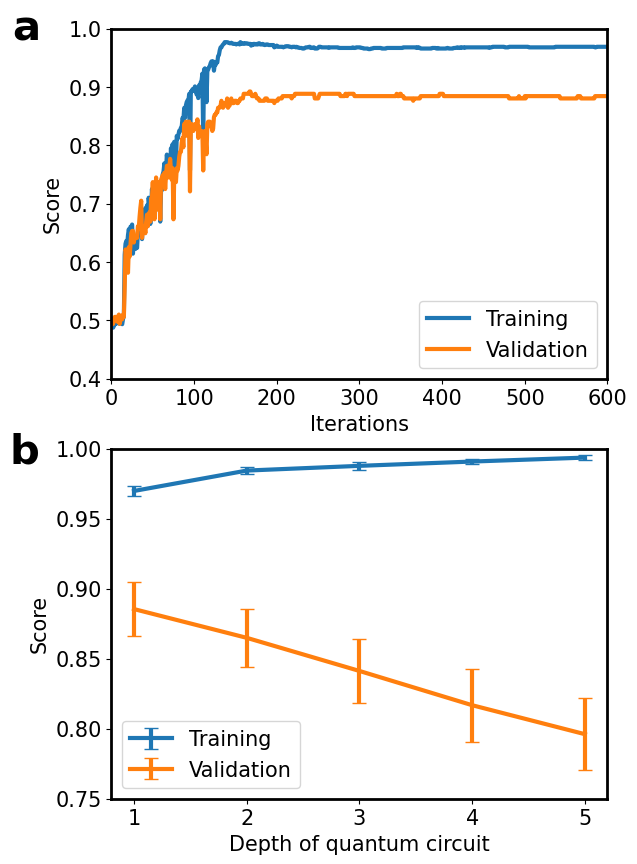

In [9]:
from matplotlib.ticker import MaxNLocator

## Figure left: score vs iterations
# Read res
with open('res/zz_2.npy', 'rb') as f:
    pca_list = np.load(f)
    entanglement_list = np.load(f)
    reps_list = np.load(f)
    iter_list_precomputed = np.load(f, allow_pickle=True)
    score_list_precomputed = np.load(f, allow_pickle=True)
    score_train_list_precomputed = np.load(f, allow_pickle=True)
# Plot figure
fig, axs = plt.subplots(2, 1, figsize=[6.4, 10])
para_inx = 0 # corresponding l=1
x = iter_list_precomputed[para_inx]
validation_score = score_list_precomputed[para_inx]
trainig_score = score_train_list_precomputed[para_inx]

axs[0].plot(x, trainig_score, label='Training', linewidth=3)
axs[0].plot(x, validation_score, label='Validation', linewidth=3)
axs[0].set(xlabel='Iterations', ylabel='Score')
axs[0].set_xlim([0, 600])
axs[0].set_ylim([0.4, 1])
axs[0].text(-120, 0.98, 'a', fontsize=30, fontweight ='bold')
axs[0].legend()



## Figure right: repetition vs score
# Read res
pca_list = []
entanglement_list = []
reps_list = []
iter_list_precomputed = []
score_list_precomputed = []
score_train_list_precomputed = []
score_list_classical = []
score_train_list_classical = []
for file_id in [1, 2, 3, 4, 5]:
    filename = 'res/zz_2.2_' + str(file_id) + '.npy'
    with open(filename, 'rb') as f:
        pca_list.append(np.load(f))
        entanglement_list.append(np.load(f))
        reps_list.append(np.load(f))
        iter_list_precomputed.append(np.load(f, allow_pickle=True))
        score_list_precomputed.append(np.load(f, allow_pickle=True))
        score_train_list_precomputed.append(np.load(f, allow_pickle=True))
        score_list_classical.append(np.load(f, allow_pickle=True))
        score_train_list_classical.append(np.load(f, allow_pickle=True))
training_score_to_plot = []
validation_score_to_plot =[]
training_score_to_plot_std = []
validation_score_to_plot_std =[]
# Plot figure
for rep_inx, rep in enumerate([1, 2, 3, 4, 5]):
    tmp_data_train = score_train_list_precomputed[rep_inx]
    tmp_data = score_list_precomputed[rep_inx]
    train_tmp = []
    tmp = []
    for abc_inx in range(len(tmp_data_train)):
        tmp_data_train_local = tmp_data_train[abc_inx]
        train_tmp.append(tmp_data_train_local[-1])
        tmp_data_local = tmp_data[abc_inx]
        tmp.append(tmp_data_local[-1])
    training_score_to_plot.append(np.mean(train_tmp))
    training_score_to_plot_std.append(np.std(train_tmp))
    validation_score_to_plot.append(np.mean(tmp))
    validation_score_to_plot_std.append(np.std(tmp))
axs[1].errorbar([1, 2, 3, 4, 5], training_score_to_plot, yerr=training_score_to_plot_std, label='Training', markersize=8, capsize=5, linewidth=3)
axs[1].errorbar([1, 2, 3, 4, 5], validation_score_to_plot, yerr=validation_score_to_plot_std, label='Validation', markersize=8, capsize=5, linewidth=3)
axs[1].xaxis.set_major_locator(MaxNLocator(integer=True))
axs[1].set(xlabel='Depth of quantum circuit', ylabel='Score')
axs[1].set_ylim([0.75, 1])
axs[1].text(-0.1, 0.99, 'b', fontsize=30, fontweight ='bold')
axs[1].legend()

# Output figure
plt.savefig('figs/Figure_2.combine_l1.pdf',bbox_inches='tight', pad_inches=0)

# 3. Testing noise (8 quitbs, circular, 2 reps)

In [9]:
# Generate parameter list
pca_list = []
entanglement_list = []
reps_list = []
noise_list = []
classical_kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for pca_tmp in [8]:
    for entanglement_tmp in ['circular']:
        for reps_tmp in [2]:
            for noise_tmp in range(16):
                pca_list.append(pca_tmp)
                entanglement_list.append(entanglement_tmp)
                reps_list.append(reps_tmp)
                noise_list.append(noise_tmp)

In [ ]:
from qiskit import BasicAer
from warnings import filterwarnings
filterwarnings('ignore')

iter_list_precomputed = []
score_list_precomputed = []
score_train_list_precomputed = []
score_list_classical = []
score_train_list_classical = []
for para_inx in range(len(pca_list)):
    print(pca_list[para_inx], entanglement_list[para_inx], reps_list[para_inx], noise_list[para_inx])
    # Load digits dataset
    data=np.genfromtxt('alloy-property-avg.csv',delimiter=",",skip_header=1)
    
    # Split as y for phase, X for other properties
    X,y=[],[]
    for i in range(len(data)):
        X.append(data[i][0:-1]), y.append(data[i][-1])
        
    # renormlaised all variables in X
    max_arr=np.max(X,axis=0)
    X=X/max_arr
    
    # Add random matrix (as white noise)
    X_noise=np.random.random((len(data),noise_list[para_inx])) # 1, 5, 10, 15
    Xnew=np.append(X, X_noise, axis=1)
    
    # Split dataset
    sample_train, sample_test, label_train, label_test = train_test_split(Xnew, y, test_size=0.2, random_state=22)

    # Reduce dimensions
    n_dim = pca_list[para_inx]
    pca = PCA(n_components=n_dim).fit(sample_train)
    sample_train = pca.transform(sample_train)
    sample_test = pca.transform(sample_test)

    # Normalise
    std_scale = StandardScaler().fit(sample_train)
    sample_train = std_scale.transform(sample_train)
    sample_test = std_scale.transform(sample_test)

    # Scale
    samples = np.append(sample_train, sample_test, axis=0)
    minmax_scale = MinMaxScaler((-1, 1)).fit(samples)
    sample_train = minmax_scale.transform(sample_train)
    sample_test = minmax_scale.transform(sample_test)
    
    # setup of kernel
    encode_map = ZZFeatureMap(feature_dimension=pca_list[para_inx], reps=reps_list[para_inx], entanglement=entanglement_list[para_inx], insert_barriers=True)
    zz_kernel = QuantumKernel(feature_map=encode_map, quantum_instance=BasicAer.get_backend('statevector_simulator'))
    
    # pre-compute
    matrix_train = zz_kernel.evaluate(x_vec=sample_train)
    matrix_test = zz_kernel.evaluate(x_vec=sample_test, y_vec=sample_train)
    
    # Get max of iteration needed
    zzpc_svc = SVC(kernel='precomputed', max_iter=-1)
    zzpc_svc.fit(matrix_train, label_train)
    max_iter = zzpc_svc.n_iter_[0] + 100
    print('Take max_iter as ', max_iter)
    print('Score of validation', zzpc_svc.score(matrix_test, label_test))
    print('Score of training', zzpc_svc.score(matrix_train, label_train))
    
    # loop over iteration from 0 to max_iteration
    iter_list_precomputed_local = []
    score_list_precomputed_local = []
    score_train_list_precomputed_local = []
    for nb_iter in range(max_iter):
        zzpc_svc = SVC(kernel='precomputed', max_iter=nb_iter)
        zzpc_svc.fit(matrix_train, label_train)
        zzpc_score = zzpc_svc.score(matrix_test, label_test)
        zzpc_score_train = zzpc_svc.score(matrix_train, label_train)
        iter_list_precomputed_local.append(nb_iter)
        score_list_precomputed_local.append(zzpc_score)
        score_train_list_precomputed_local.append(zzpc_score_train)
        # print(f'Precomputed kernel classification test score: {zzpc_score}')
        
    # Get score for classical kernals
    score_list_classical_local = []
    score_train_list_classical_local = []
    for kernel_idx, kernel in enumerate(classical_kernels):
        classical_svc = SVC(kernel=kernel, max_iter=-1)
        classical_svc.fit(sample_train, label_train)
        classical_score = classical_svc.score(sample_test, label_test)
        classical_train_score = classical_svc.score(sample_train, label_train)
        score_list_classical_local.append(classical_score)
        score_train_list_classical_local.append(classical_train_score)
    print('Score of validation (classical)', score_list_classical_local)
    print('Score of training (classical)', score_train_list_classical_local)
    iter_list_precomputed.append(iter_list_precomputed_local)
    score_list_precomputed.append(score_list_precomputed_local)
    score_train_list_precomputed.append(score_train_list_precomputed_local)
    score_list_classical.append(score_list_classical_local)
    score_train_list_classical.append(score_train_list_classical_local)

In [41]:
# save results to file
if not os.path.exists('res/zz_3.npy'):
    with open('res/zz_3.npy', 'wb') as f:
        np.save(f, np.array(pca_list))
        np.save(f, np.array(entanglement_list))
        np.save(f, np.array(reps_list))
        np.save(f, np.array(noise_list))
        np.save(f, np.array(iter_list_precomputed))
        np.save(f, np.array(score_list_precomputed))
        np.save(f, np.array(score_train_list_precomputed))
        np.save(f, np.array(score_list_classical))
        np.save(f, np.array(score_train_list_classical))

In [18]:
with open('res/zz_3.npy', 'rb') as f:
    pca_list = np.load(f)
    entanglement_list = np.load(f)
    reps_list = np.load(f)
    noise_list = np.load(f)
    iter_list_precomputed = np.load(f, allow_pickle=True)
    score_list_precomputed = np.load(f, allow_pickle=True)
    score_train_list_precomputed = np.load(f, allow_pickle=True)
    score_list_classical = np.load(f, allow_pickle=True)
    score_train_list_classical = np.load(f, allow_pickle=True)

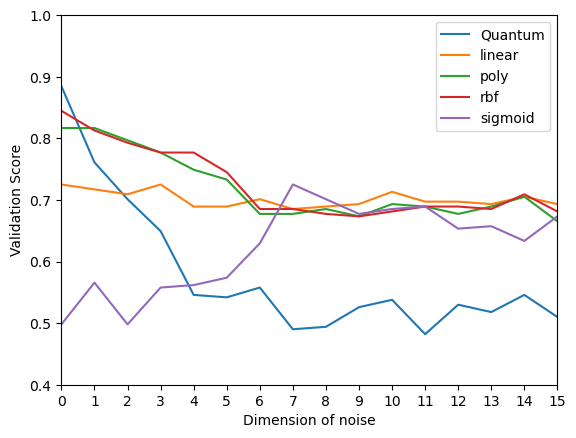

In [28]:
from matplotlib.ticker import MaxNLocator

train_score_to_plot = []
validation_score_to_plot = []
score_train_list_classical = np.array(score_train_list_classical)
score_list_classical = np.array(score_list_classical)
for para_inx in range(len(noise_list)):
    train_score_to_plot.append(score_train_list_precomputed[para_inx][-1])
    validation_score_to_plot.append(score_list_precomputed[para_inx][-1])

ax = plt.figure().gca()
#plt.plot(range(16), train_score_to_plot, label='Training')
plt.plot(range(16), validation_score_to_plot, label='Quantum')
for kernel_idx, kernel in enumerate(classical_kernels):
#    plt.plot(range(16), score_train_list_classical[:, kernel_idx], label='Training')
    plt.plot(range(16), score_list_classical[:, kernel_idx], label=kernel)

ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.xlabel('Dimension of noise')
plt.ylabel('Validation Score')
plt.legend()
plt.xlim([0, 15])
plt.ylim([0.4, 1])
plt.xticks(range(16))
plt.savefig('figs/Figure_supp_4.circular_8qubits_2_noise_validation.pdf')

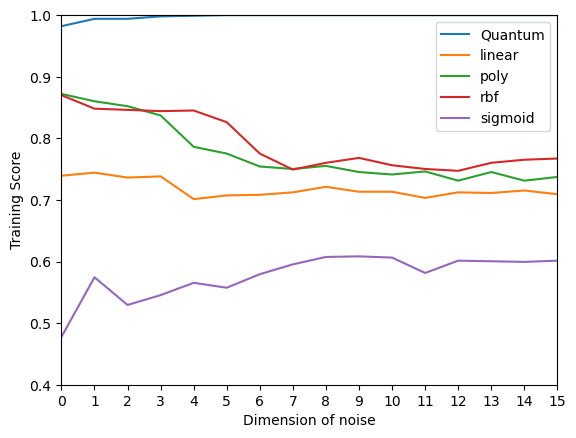

In [30]:
from matplotlib.ticker import MaxNLocator

train_score_to_plot = []
validation_score_to_plot = []
score_train_list_classical = np.array(score_train_list_classical)
score_list_classical = np.array(score_list_classical)
for para_inx in range(len(noise_list)):
    train_score_to_plot.append(score_train_list_precomputed[para_inx][-1])
    validation_score_to_plot.append(score_list_precomputed[para_inx][-1])

ax = plt.figure().gca()
plt.plot(range(16), train_score_to_plot, label='Quantum')
for kernel_idx, kernel in enumerate(classical_kernels):
    plt.plot(range(16), score_train_list_classical[:, kernel_idx], label=kernel)

ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.xlabel('Dimension of noise')
plt.ylabel('Training Score')
plt.legend()
plt.xlim([0, 15])
plt.ylim([0.4, 1])
plt.xticks(range(16))
plt.savefig('figs/Figure_supp_4.circular_8qubits_2_noise_training.pdf')

# 3.2 Testing noise (8 quitbs, circular, 2 reps), error bar from split of dataset

In [84]:
# Generate parameter list
pca_list = []
entanglement_list = []
reps_list = []
noise_list = []
classical_kernels = ['linear', 'poly', 'rbf', 'sigmoid']
classical_kernels_text = ['Linear', 'Poly', 'RBF', 'Sigmoid']
for pca_tmp in [8]:
    for entanglement_tmp in ['circular']:
        for reps_tmp in [2]:
            for noise_tmp in range(16):
                pca_list.append(pca_tmp)
                entanglement_list.append(entanglement_tmp)
                reps_list.append(reps_tmp)
                noise_list.append(noise_tmp)

In [ ]:
from qiskit import BasicAer
from warnings import filterwarnings
filterwarnings('ignore')

iter_list_precomputed = []
score_list_precomputed = []
score_train_list_precomputed = []
score_list_classical = []
score_train_list_classical = []
nb_rand_sampling = 2
for para_inx in range(len(pca_list)):
    print(pca_list[para_inx], entanglement_list[para_inx], reps_list[para_inx], noise_list[para_inx])
    # Randomly sample dataset
    iter_list_precomputed_local = []
    score_list_precomputed_local = []
    score_train_list_precomputed_local = []
    score_list_classical_local = []
    score_train_list_classical_local = []
    for attemp_i in range(nb_rand_sampling):
        # Load digits dataset
        data=np.genfromtxt('alloy-property-avg.csv',delimiter=",",skip_header=1)

        # Split as y for phase, X for other properties
        X,y=[],[]
        for i in range(len(data)):
            X.append(data[i][0:-1]), y.append(data[i][-1])

        # renormlaised all variables in X
        max_arr=np.max(X,axis=0)
        X=X/max_arr

        # Add random matrix (as white noise)
        X_noise=np.random.random((len(data), noise_list[para_inx])) # 1, 5, 10, 15
        Xnew=np.append(X, X_noise, axis=1)

        # Split dataset
        sample_train, sample_test, label_train, label_test = train_test_split(Xnew, y, test_size=0.2, random_state=22+attemp_i)

        # Reduce dimensions
        n_dim = pca_list[para_inx]
        pca = PCA(n_components=n_dim).fit(sample_train)
        sample_train = pca.transform(sample_train)
        sample_test = pca.transform(sample_test)

        # Normalise
        std_scale = StandardScaler().fit(sample_train)
        sample_train = std_scale.transform(sample_train)
        sample_test = std_scale.transform(sample_test)

        # Scale
        samples = np.append(sample_train, sample_test, axis=0)
        minmax_scale = MinMaxScaler((-1, 1)).fit(samples)
        sample_train = minmax_scale.transform(sample_train)
        sample_test = minmax_scale.transform(sample_test)

        # setup of kernel
        encode_map = ZZFeatureMap(feature_dimension=pca_list[para_inx], reps=reps_list[para_inx], entanglement=entanglement_list[para_inx], insert_barriers=True)
        zz_kernel = QuantumKernel(feature_map=encode_map, quantum_instance=BasicAer.get_backend('statevector_simulator'))

        # pre-compute
        matrix_train = zz_kernel.evaluate(x_vec=sample_train)
        matrix_test = zz_kernel.evaluate(x_vec=sample_test, y_vec=sample_train)

        # Get max of iteration needed
        zzpc_svc = SVC(kernel='precomputed', max_iter=-1)
        zzpc_svc.fit(matrix_train, label_train)
        max_iter = zzpc_svc.n_iter_[0] + 100
        print('Attempt ', attemp_i)
        print('Take max_iter as ', max_iter)
        print('Score of validation', zzpc_svc.score(matrix_test, label_test))
        print('Score of training', zzpc_svc.score(matrix_train, label_train))

        # loop over iteration from 0 to max_iteration
        iter_list_precomputed_local_local = []
        score_list_precomputed_local_local = []
        score_train_list_precomputed_local_local = []
        for nb_iter in range(max_iter):
            zzpc_svc = SVC(kernel='precomputed', max_iter=nb_iter)
            zzpc_svc.fit(matrix_train, label_train)
            zzpc_score = zzpc_svc.score(matrix_test, label_test)
            zzpc_score_train = zzpc_svc.score(matrix_train, label_train)
            iter_list_precomputed_local_local.append(nb_iter)
            score_list_precomputed_local_local.append(zzpc_score)
            score_train_list_precomputed_local_local.append(zzpc_score_train)
            # print(f'Precomputed kernel classification test score: {zzpc_score}')

        # Get score for classical kernals
        score_list_classical_local_local = []
        score_train_list_classical_local_local = []
        for kernel_idx, kernel in enumerate(classical_kernels):
            classical_svc = SVC(kernel=kernel, max_iter=-1)
            classical_svc.fit(sample_train, label_train)
            classical_score = classical_svc.score(sample_test, label_test)
            classical_train_score = classical_svc.score(sample_train, label_train)
            score_list_classical_local_local.append(classical_score)
            score_train_list_classical_local_local.append(classical_train_score)
        print('Score of validation (classical)', score_list_classical_local_local)
        print('Score of training (classical)', score_train_list_classical_local_local)
        iter_list_precomputed_local.append(iter_list_precomputed_local_local)
        score_list_precomputed_local.append(score_list_precomputed_local_local)
        score_train_list_precomputed_local.append(score_train_list_precomputed_local_local)
        score_list_classical_local.append(score_list_classical_local_local)
        score_train_list_classical_local.append(score_train_list_classical_local_local)
        
    iter_list_precomputed.append(iter_list_precomputed_local)
    score_list_precomputed.append(score_list_precomputed_local)
    score_train_list_precomputed.append(score_train_list_precomputed_local)
    score_list_classical.append(score_list_classical_local)
    score_train_list_classical.append(score_train_list_classical_local)

In [41]:
# save results to file
if not os.path.exists('res/zz_3.2.npy'):
    with open('res/zz_3.2.npy', 'wb') as f:
        np.save(f, np.array(pca_list))
        np.save(f, np.array(entanglement_list))
        np.save(f, np.array(reps_list))
        np.save(f, np.array(noise_list))
        np.save(f, np.array(iter_list_precomputed))
        np.save(f, np.array(score_list_precomputed))
        np.save(f, np.array(score_train_list_precomputed))
        np.save(f, np.array(score_list_classical))
        np.save(f, np.array(score_train_list_classical))

In [6]:
# ___not_used_old_read_______
with open('res/zz_3.2.npy', 'rb') as f:
    pca_list = np.load(f)
    entanglement_list = np.load(f)
    reps_list = np.load(f)
    noise_list = np.load(f)
    iter_list_precomputed = np.load(f, allow_pickle=True)
    score_list_precomputed = np.load(f, allow_pickle=True)
    score_train_list_precomputed = np.load(f, allow_pickle=True)
    score_list_classical = np.load(f, allow_pickle=True)
    score_train_list_classical = np.load(f, allow_pickle=True)

In [85]:
# New read of results file from run_3.2_split.sh
noise_list = []
pca_list = []
entanglement_list = []
reps_list = []
noise_list = []
iter_list_precomputed = []
score_list_precomputed = []
score_train_list_precomputed = []
score_list_classical = []
score_train_list_classical = []
for file_id in range(16):
    filename = 'res/zz_3.2_' + str(file_id) + '.npy'
    with open(filename, 'rb') as f:
        pca_list.append(np.load(f))
        entanglement_list.append(np.load(f))
        reps_list.append(np.load(f))
        noise_list.append(np.load(f))
        iter_list_precomputed.append(np.load(f, allow_pickle=True))
        score_list_precomputed.append(np.load(f, allow_pickle=True))
        score_train_list_precomputed.append(np.load(f, allow_pickle=True))
        score_list_classical.append(np.load(f, allow_pickle=True))
        score_train_list_classical.append(np.load(f, allow_pickle=True))

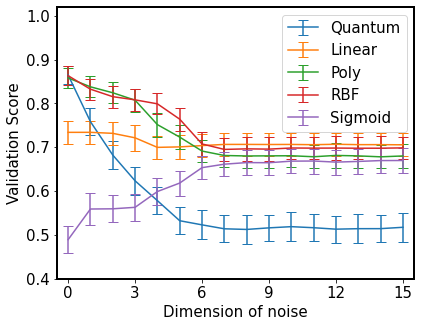

In [88]:
from matplotlib.ticker import MaxNLocator

validation_score_to_plot = []
validation_score_to_plot_std = []
for para_inx in range(len(noise_list)):
    tmp_data = score_list_precomputed[para_inx]
    tmp = []
    for abc_inx in range(len(tmp_data)):
        tmp_data_local = tmp_data[abc_inx]
        tmp.append(tmp_data_local[-1])
    validation_score_to_plot.append(np.mean(tmp))
    validation_score_to_plot_std.append(np.std(tmp))

ax = plt.figure(figsize=[6.4, 5]).gca()
plt.errorbar(range(16), validation_score_to_plot, yerr=validation_score_to_plot_std, label='Quantum', markersize=8, capsize=5)

for kernel_idx, kernel in enumerate(classical_kernels_text):
    validation_score_to_plot = []
    validation_score_to_plot_std = []
    for para_inx in range(len(noise_list)):
        tmp_data = np.array(score_list_classical[para_inx])[:, kernel_idx]
        validation_score_to_plot.append(np.mean(tmp_data))
        validation_score_to_plot_std.append(np.std(tmp_data))
    plt.errorbar(range(16), validation_score_to_plot, yerr=validation_score_to_plot_std, label=kernel, markersize=8, capsize=5)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.xlabel('Dimension of noise')
plt.ylabel('Validation Score')
plt.legend()
plt.xlim([-0.5, 15.5])
plt.ylim([0.4, 1.02])
plt.xticks(range(0,16,3))
plt.savefig('figs/Figure_supp_4.circular_8qubits_2_noise_validation_2.pdf',bbox_inches='tight', pad_inches=0) 

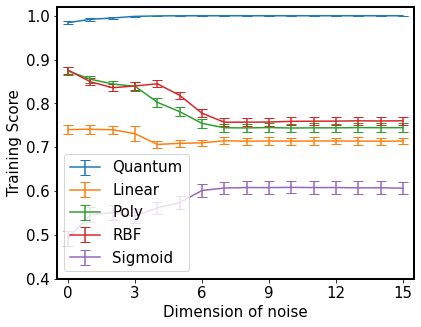

In [50]:
from matplotlib.ticker import MaxNLocator

training_score_to_plot = []
training_score_to_plot_std = []
for para_inx in range(len(noise_list)):
    tmp_data_train = score_train_list_precomputed[para_inx]
    train_tmp = []
    for abc_inx in range(len(tmp_data_train)):
        tmp_data_train_local = tmp_data_train[abc_inx]
        train_tmp.append(tmp_data_train_local[-1])
    training_score_to_plot.append(np.mean(train_tmp))
    training_score_to_plot_std.append(np.std(train_tmp))

ax = plt.figure(figsize=[6.4, 5]).gca()
plt.errorbar(range(16), training_score_to_plot, yerr=training_score_to_plot_std, label='Quantum', markersize=8, capsize=5)

for kernel_idx, kernel in enumerate(classical_kernels_text):
    training_score_to_plot = []
    training_score_to_plot_std = []
    for para_inx in range(len(noise_list)):
        tmp_data_train = np.array(score_train_list_classical[para_inx])[:, kernel_idx]
        training_score_to_plot.append(np.mean(tmp_data_train))
        training_score_to_plot_std.append(np.std(tmp_data_train))
    plt.errorbar(range(16), training_score_to_plot, yerr=training_score_to_plot_std, label=kernel, markersize=8, capsize=5)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.xlabel('Dimension of noise')
plt.ylabel('Training Score')
plt.legend()
plt.xlim([-0.5, 15.5])
plt.ylim([0.4, 1.02])
plt.xticks(range(0,16,3))
plt.savefig('figs/Figure_supp_4.circular_8qubits_2_noise_training_2.pdf',bbox_inches='tight', pad_inches=0)

# 3.3 Testing noise (8 quitbs, circular, 2 reps), error bar from split of dataset, simplify

In [116]:
# Generate parameter list
pca_list = []
entanglement_list = []
reps_list = []
noise_list = []
classical_kernels = ['linear', 'poly', 'rbf', 'sigmoid']
classical_kernels_text = ['Linear', 'Poly', 'RBF', 'Sigmoid']
for pca_tmp in [8]:
    for entanglement_tmp in ['circular']:
        for reps_tmp in [2]:
            for noise_tmp in range(16):
                pca_list.append(pca_tmp)
                entanglement_list.append(entanglement_tmp)
                reps_list.append(reps_tmp)
                noise_list.append(noise_tmp)

In [ ]:
from qiskit import BasicAer
from warnings import filterwarnings
filterwarnings('ignore')

iter_list_precomputed = []
score_list_precomputed = []
score_train_list_precomputed = []
score_list_classical = []
score_train_list_classical = []
nb_rand_sampling = 2
for para_inx in range(len(pca_list)):
    print(pca_list[para_inx], entanglement_list[para_inx], reps_list[para_inx], noise_list[para_inx])
    # Randomly sample dataset
    iter_list_precomputed_local = []
    score_list_precomputed_local = []
    score_train_list_precomputed_local = []
    score_list_classical_local = []
    score_train_list_classical_local = []
    for attemp_i in range(nb_rand_sampling):
        # Load digits dataset
        data=np.genfromtxt('alloy-property-avg.csv',delimiter=",",skip_header=1)

        # Split as y for phase, X for other properties
        X,y=[],[]
        for i in range(len(data)):
            X.append(data[i][0:-1]), y.append(data[i][-1])

        # renormlaised all variables in X
        max_arr=np.max(X,axis=0)
        X=X/max_arr

        # Add random matrix (as white noise)
        X_noise=np.random.random((len(data), noise_list[para_inx])) # 1, 5, 10, 15
        Xnew=np.append(X, X_noise, axis=1)

        # Split dataset
        sample_train, sample_test, label_train, label_test = train_test_split(Xnew, y, test_size=0.2, random_state=22+attemp_i)

        # Reduce dimensions
        n_dim = pca_list[para_inx]
        pca = PCA(n_components=n_dim).fit(sample_train)
        sample_train = pca.transform(sample_train)
        sample_test = pca.transform(sample_test)

        # Normalise
        std_scale = StandardScaler().fit(sample_train)
        sample_train = std_scale.transform(sample_train)
        sample_test = std_scale.transform(sample_test)

        # Scale
        samples = np.append(sample_train, sample_test, axis=0)
        minmax_scale = MinMaxScaler((-1, 1)).fit(samples)
        sample_train = minmax_scale.transform(sample_train)
        sample_test = minmax_scale.transform(sample_test)

        # setup of kernel
        encode_map = ZZFeatureMap(feature_dimension=pca_list[para_inx], reps=reps_list[para_inx], entanglement=entanglement_list[para_inx], insert_barriers=True)
        zz_kernel = QuantumKernel(feature_map=encode_map, quantum_instance=BasicAer.get_backend('statevector_simulator'))

        # pre-compute
        matrix_train = zz_kernel.evaluate(x_vec=sample_train)
        matrix_test = zz_kernel.evaluate(x_vec=sample_test, y_vec=sample_train)

        # Get max of iteration needed
        zzpc_svc = SVC(kernel='precomputed', max_iter=-1)
        zzpc_svc.fit(matrix_train, label_train)
        # max_iter = zzpc_svc.n_iter_[0] + 100
        train_score = zzpc_svc.score(matrix_train, label_train)
        validation_score = zzpc_svc.score(matrix_test, label_test)
        score_list_precomputed_local.append(validation_score)
        score_train_list_precomputed_local.append(train_score)
        print('Attempt ', attemp_i)
        # print('Take max_iter as ', max_iter)
        print('Score of validation', validation_score)
        print('Score of training', train_score)

        # Get score for classical kernals
        score_list_classical_local_local = []
        score_train_list_classical_local_local = []
        for kernel_idx, kernel in enumerate(classical_kernels):
            classical_svc = SVC(kernel=kernel, max_iter=-1)
            classical_svc.fit(sample_train, label_train)
            classical_score = classical_svc.score(sample_test, label_test)
            classical_train_score = classical_svc.score(sample_train, label_train)
            score_list_classical_local_local.append(classical_score)
            score_train_list_classical_local_local.append(classical_train_score)
        print('Score of validation (classical)', score_list_classical_local_local)
        print('Score of training (classical)', score_train_list_classical_local_local)
        score_list_classical_local.append(score_list_classical_local_local)
        score_train_list_classical_local.append(score_train_list_classical_local_local)
        
    score_list_precomputed.append(score_list_precomputed_local)
    score_train_list_precomputed.append(score_train_list_precomputed_local)
    score_list_classical.append(score_list_classical_local)
    score_train_list_classical.append(score_train_list_classical_local)

In [41]:
# save results to file
if not os.path.exists('res/zz_3.3.npy'):
    with open('res/zz_3.3.npy', 'wb') as f:
        np.save(f, np.array(pca_list))
        np.save(f, np.array(entanglement_list))
        np.save(f, np.array(reps_list))
        np.save(f, np.array(noise_list))
        np.save(f, np.array(score_list_precomputed))
        np.save(f, np.array(score_train_list_precomputed))
        np.save(f, np.array(score_list_classical))
        np.save(f, np.array(score_train_list_classical))

In [6]:
# ___not_used_old_read_______
with open('res/zz_3.3.npy', 'rb') as f:
    pca_list = np.load(f)
    entanglement_list = np.load(f)
    reps_list = np.load(f)
    noise_list = np.load(f)
    score_list_precomputed = np.load(f, allow_pickle=True)
    score_train_list_precomputed = np.load(f, allow_pickle=True)
    score_list_classical = np.load(f, allow_pickle=True)
    score_train_list_classical = np.load(f, allow_pickle=True)

In [139]:
# New read of results file from run_3.3_split.sh
noise_list = []
pca_list = []
entanglement_list = []
reps_list = []
noise_list = []
score_list_precomputed = []
score_train_list_precomputed = []
score_list_classical = []
score_train_list_classical = []
for file_id in range(16):
    filename = 'res/zz_3.3_' + str(file_id) + '.npy'
    with open(filename, 'rb') as f:
        pca_list.append(np.load(f))
        entanglement_list.append(np.load(f))
        reps_list.append(np.load(f))
        noise_list.append(np.load(f))
        score_list_precomputed.append(np.load(f, allow_pickle=True))
        score_train_list_precomputed.append(np.load(f, allow_pickle=True))
        score_list_classical.append(np.load(f, allow_pickle=True))
        score_train_list_classical.append(np.load(f, allow_pickle=True))

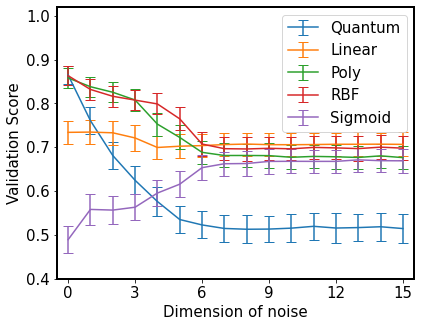

In [140]:
from matplotlib.ticker import MaxNLocator

validation_score_to_plot = []
validation_score_to_plot_std = []
for para_inx in range(len(noise_list)):
    tmp_data = score_list_precomputed[para_inx]
    validation_score_to_plot.append(np.mean(tmp_data))
    validation_score_to_plot_std.append(np.std(tmp_data))

ax = plt.figure(figsize=[6.4, 5]).gca()
plt.errorbar(range(16), validation_score_to_plot, yerr=validation_score_to_plot_std, label='Quantum', markersize=8, capsize=5)

for kernel_idx, kernel in enumerate(classical_kernels_text):
    validation_score_to_plot = []
    validation_score_to_plot_std = []
    for para_inx in range(len(noise_list)):
        tmp_data = np.array(score_list_classical[para_inx])[:, kernel_idx]
        validation_score_to_plot.append(np.mean(tmp_data))
        validation_score_to_plot_std.append(np.std(tmp_data))
    plt.errorbar(range(16), validation_score_to_plot, yerr=validation_score_to_plot_std, label=kernel, markersize=8, capsize=5)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.xlabel('Dimension of noise')
plt.ylabel('Validation Score')
plt.legend()
plt.xlim([-0.5, 15.5])
plt.ylim([0.4, 1.02])
plt.xticks(range(0,16,3))
plt.savefig('figs/Figure_supp_4.circular_8qubits_2_noise_validation_3.pdf',bbox_inches='tight', pad_inches=0) 

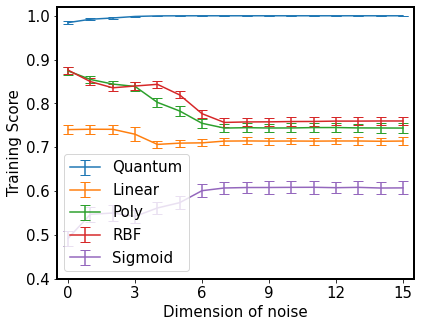

In [141]:
from matplotlib.ticker import MaxNLocator

training_score_to_plot = []
training_score_to_plot_std = []
for para_inx in range(len(noise_list)):
    tmp_data_train = score_train_list_precomputed[para_inx]
    training_score_to_plot.append(np.mean(tmp_data_train))
    training_score_to_plot_std.append(np.std(tmp_data_train))

ax = plt.figure(figsize=[6.4, 5]).gca()
plt.errorbar(range(16), training_score_to_plot, yerr=training_score_to_plot_std, label='Quantum', markersize=8, capsize=5)

for kernel_idx, kernel in enumerate(classical_kernels_text):
    training_score_to_plot = []
    training_score_to_plot_std = []
    for para_inx in range(len(noise_list)):
        tmp_data_train = np.array(score_train_list_classical[para_inx])[:, kernel_idx]
        training_score_to_plot.append(np.mean(tmp_data_train))
        training_score_to_plot_std.append(np.std(tmp_data_train))
    plt.errorbar(range(16), training_score_to_plot, yerr=training_score_to_plot_std, label=kernel, markersize=8, capsize=5)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.xlabel('Dimension of noise')
plt.ylabel('Training Score')
plt.legend()
plt.xlim([-0.5, 15.5])
plt.ylim([0.4, 1.02])
plt.xticks(range(0,16,3))
plt.savefig('figs/Figure_supp_4.circular_8qubits_2_noise_training_3.pdf',bbox_inches='tight', pad_inches=0)

# 3.4 Testing noise (8 quitbs, circular, 1 reps), error bar from split of dataset, simplify

In [19]:
# Generate parameter list
pca_list = []
entanglement_list = []
reps_list = []
noise_list = []
classical_kernels = ['linear', 'poly', 'rbf', 'sigmoid']
classical_kernels_text = ['Linear', 'Poly', 'RBF', 'Sigmoid']
for pca_tmp in [8]:
    for entanglement_tmp in ['circular']:
        for reps_tmp in [1]:
            for noise_tmp in range(16):
                pca_list.append(pca_tmp)
                entanglement_list.append(entanglement_tmp)
                reps_list.append(reps_tmp)
                noise_list.append(noise_tmp)

In [ ]:
from qiskit import BasicAer
from warnings import filterwarnings
filterwarnings('ignore')

iter_list_precomputed = []
score_list_precomputed = []
score_train_list_precomputed = []
score_list_classical = []
score_train_list_classical = []
nb_rand_sampling = 300
for para_inx in range(len(pca_list)):
    print(pca_list[para_inx], entanglement_list[para_inx], reps_list[para_inx], noise_list[para_inx])
    # Randomly sample dataset
    iter_list_precomputed_local = []
    score_list_precomputed_local = []
    score_train_list_precomputed_local = []
    score_list_classical_local = []
    score_train_list_classical_local = []
    for attemp_i in range(nb_rand_sampling):
        # Load digits dataset
        data=np.genfromtxt('alloy-property-avg.csv',delimiter=",",skip_header=1)

        # Split as y for phase, X for other properties
        X,y=[],[]
        for i in range(len(data)):
            X.append(data[i][0:-1]), y.append(data[i][-1])

        # renormlaised all variables in X
        max_arr=np.max(X,axis=0)
        X=X/max_arr

        # Add random matrix (as white noise)
        X_noise=np.random.random((len(data), noise_list[para_inx])) # 1, 5, 10, 15
        Xnew=np.append(X, X_noise, axis=1)

        # Split dataset
        sample_train, sample_test, label_train, label_test = train_test_split(Xnew, y, test_size=0.2, random_state=22+attemp_i)

        # Reduce dimensions
        n_dim = pca_list[para_inx]
        pca = PCA(n_components=n_dim).fit(sample_train)
        sample_train = pca.transform(sample_train)
        sample_test = pca.transform(sample_test)

        # Normalise
        std_scale = StandardScaler().fit(sample_train)
        sample_train = std_scale.transform(sample_train)
        sample_test = std_scale.transform(sample_test)

        # Scale
        samples = np.append(sample_train, sample_test, axis=0)
        minmax_scale = MinMaxScaler((-1, 1)).fit(samples)
        sample_train = minmax_scale.transform(sample_train)
        sample_test = minmax_scale.transform(sample_test)

        # setup of kernel
        encode_map = ZZFeatureMap(feature_dimension=pca_list[para_inx], reps=reps_list[para_inx], entanglement=entanglement_list[para_inx], insert_barriers=True)
        zz_kernel = QuantumKernel(feature_map=encode_map, quantum_instance=BasicAer.get_backend('statevector_simulator'))

        # pre-compute
        matrix_train = zz_kernel.evaluate(x_vec=sample_train)
        matrix_test = zz_kernel.evaluate(x_vec=sample_test, y_vec=sample_train)

        # Get max of iteration needed
        zzpc_svc = SVC(kernel='precomputed', max_iter=-1)
        zzpc_svc.fit(matrix_train, label_train)
        # max_iter = zzpc_svc.n_iter_[0] + 100
        train_score = zzpc_svc.score(matrix_train, label_train)
        validation_score = zzpc_svc.score(matrix_test, label_test)
        score_list_precomputed_local.append(validation_score)
        score_train_list_precomputed_local.append(train_score)
        print('Attempt ', attemp_i)
        # print('Take max_iter as ', max_iter)
        print('Score of validation', validation_score)
        print('Score of training', train_score)

        # Get score for classical kernals
        score_list_classical_local_local = []
        score_train_list_classical_local_local = []
        for kernel_idx, kernel in enumerate(classical_kernels):
            classical_svc = SVC(kernel=kernel, max_iter=-1)
            classical_svc.fit(sample_train, label_train)
            classical_score = classical_svc.score(sample_test, label_test)
            classical_train_score = classical_svc.score(sample_train, label_train)
            score_list_classical_local_local.append(classical_score)
            score_train_list_classical_local_local.append(classical_train_score)
        print('Score of validation (classical)', score_list_classical_local_local)
        print('Score of training (classical)', score_train_list_classical_local_local)
        score_list_classical_local.append(score_list_classical_local_local)
        score_train_list_classical_local.append(score_train_list_classical_local_local)
        
    score_list_precomputed.append(score_list_precomputed_local)
    score_train_list_precomputed.append(score_train_list_precomputed_local)
    score_list_classical.append(score_list_classical_local)
    score_train_list_classical.append(score_train_list_classical_local)

In [41]:
# save results to file
if not os.path.exists('res/zz_3.4.npy'):
    with open('res/zz_3.4.npy', 'wb') as f:
        np.save(f, np.array(pca_list))
        np.save(f, np.array(entanglement_list))
        np.save(f, np.array(reps_list))
        np.save(f, np.array(noise_list))
        np.save(f, np.array(score_list_precomputed))
        np.save(f, np.array(score_train_list_precomputed))
        np.save(f, np.array(score_list_classical))
        np.save(f, np.array(score_train_list_classical))

In [6]:
# ___not_used_old_read_______
with open('res/zz_3.4.npy', 'rb') as f:
    pca_list = np.load(f)
    entanglement_list = np.load(f)
    reps_list = np.load(f)
    noise_list = np.load(f)
    score_list_precomputed = np.load(f, allow_pickle=True)
    score_train_list_precomputed = np.load(f, allow_pickle=True)
    score_list_classical = np.load(f, allow_pickle=True)
    score_train_list_classical = np.load(f, allow_pickle=True)

In [20]:
# New read of results file from run_3.4_split.sh
noise_list = []
pca_list = []
entanglement_list = []
reps_list = []
noise_list = []
score_list_precomputed = []
score_train_list_precomputed = []
score_list_classical = []
score_train_list_classical = []
for file_id in range(16):
    filename = 'res/zz_3.4_' + str(file_id) + '.npy'
    with open(filename, 'rb') as f:
        pca_list.append(np.load(f))
        entanglement_list.append(np.load(f))
        reps_list.append(np.load(f))
        noise_list.append(np.load(f))
        score_list_precomputed.append(np.load(f, allow_pickle=True))
        score_train_list_precomputed.append(np.load(f, allow_pickle=True))
        score_list_classical.append(np.load(f, allow_pickle=True))
        score_train_list_classical.append(np.load(f, allow_pickle=True))

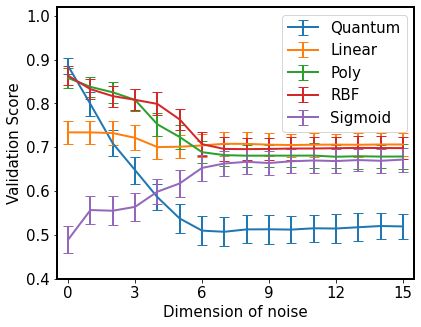

In [38]:
from matplotlib.ticker import MaxNLocator

validation_score_to_plot = []
validation_score_to_plot_std = []
for para_inx in range(len(noise_list)):
    tmp_data = score_list_precomputed[para_inx]
    validation_score_to_plot.append(np.mean(tmp_data))
    validation_score_to_plot_std.append(np.std(tmp_data))

ax = plt.figure(figsize=[6.4, 5]).gca()
plt.errorbar(range(16), validation_score_to_plot, yerr=validation_score_to_plot_std, label='Quantum', markersize=8, capsize=5, linewidth=2)

for kernel_idx, kernel in enumerate(classical_kernels_text):
    validation_score_to_plot = []
    validation_score_to_plot_std = []
    for para_inx in range(len(noise_list)):
        tmp_data = np.array(score_list_classical[para_inx])[:, kernel_idx]
        validation_score_to_plot.append(np.mean(tmp_data))
        validation_score_to_plot_std.append(np.std(tmp_data))
    plt.errorbar(range(16), validation_score_to_plot, yerr=validation_score_to_plot_std, label=kernel, markersize=8, capsize=5, linewidth=2)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.xlabel('Dimension of noise')
plt.ylabel('Validation Score')
plt.legend()
plt.xlim([-0.5, 15.5])
plt.ylim([0.4, 1.02])
plt.xticks(range(0,16,3))
plt.savefig('figs/Figure_supp_4.circular_8qubits_1_noise_validation_3.pdf',bbox_inches='tight', pad_inches=0) 

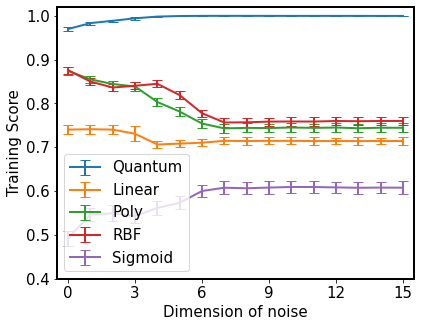

In [39]:
from matplotlib.ticker import MaxNLocator

training_score_to_plot = []
training_score_to_plot_std = []
for para_inx in range(len(noise_list)):
    tmp_data_train = score_train_list_precomputed[para_inx]
    training_score_to_plot.append(np.mean(tmp_data_train))
    training_score_to_plot_std.append(np.std(tmp_data_train))

ax = plt.figure(figsize=[6.4, 5]).gca()
plt.errorbar(range(16), training_score_to_plot, yerr=training_score_to_plot_std, label='Quantum', markersize=8, capsize=5, linewidth=2)

for kernel_idx, kernel in enumerate(classical_kernels_text):
    training_score_to_plot = []
    training_score_to_plot_std = []
    for para_inx in range(len(noise_list)):
        tmp_data_train = np.array(score_train_list_classical[para_inx])[:, kernel_idx]
        training_score_to_plot.append(np.mean(tmp_data_train))
        training_score_to_plot_std.append(np.std(tmp_data_train))
    plt.errorbar(range(16), training_score_to_plot, yerr=training_score_to_plot_std, label=kernel, markersize=8, capsize=5, linewidth=2)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.xlabel('Dimension of noise')
plt.ylabel('Training Score')
plt.legend()
plt.xlim([-0.5, 15.5])
plt.ylim([0.4, 1.02])
plt.xticks(range(0,16,3))
plt.savefig('figs/Figure_supp_4.circular_8qubits_1_noise_training_3.pdf',bbox_inches='tight', pad_inches=0)

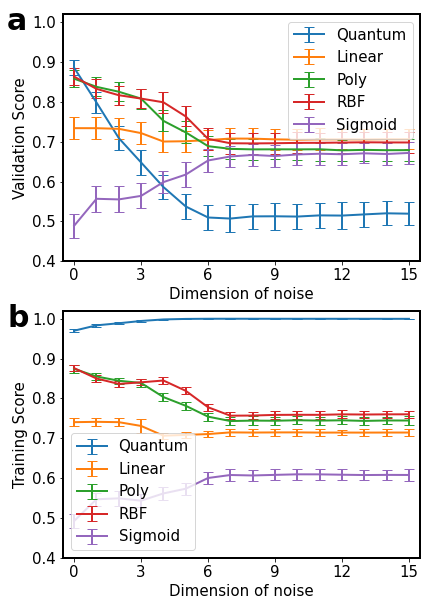

In [36]:
# Combine above two figures
from matplotlib.ticker import MaxNLocator

fig, axs = plt.subplots(2, 1, figsize=[6.4, 10])

validation_score_to_plot = []
validation_score_to_plot_std = []
training_score_to_plot = []
training_score_to_plot_std = []
for para_inx in range(len(noise_list)):
    tmp_data = score_list_precomputed[para_inx]
    validation_score_to_plot.append(np.mean(tmp_data))
    validation_score_to_plot_std.append(np.std(tmp_data))
    tmp_data_train = score_train_list_precomputed[para_inx]
    training_score_to_plot.append(np.mean(tmp_data_train))
    training_score_to_plot_std.append(np.std(tmp_data_train))

axs[0].errorbar(range(16), validation_score_to_plot, yerr=validation_score_to_plot_std, label='Quantum', markersize=8, capsize=5, linewidth=2)
axs[1].errorbar(range(16), training_score_to_plot, yerr=training_score_to_plot_std, label='Quantum', markersize=8, capsize=5, linewidth=2)

for kernel_idx, kernel in enumerate(classical_kernels_text):
    validation_score_to_plot = []
    validation_score_to_plot_std = []
    training_score_to_plot = []
    training_score_to_plot_std = []
    for para_inx in range(len(noise_list)):
        tmp_data = np.array(score_list_classical[para_inx])[:, kernel_idx]
        tmp_data_train = np.array(score_train_list_classical[para_inx])[:, kernel_idx]
        validation_score_to_plot.append(np.mean(tmp_data))
        validation_score_to_plot_std.append(np.std(tmp_data))
        training_score_to_plot.append(np.mean(tmp_data_train))
        training_score_to_plot_std.append(np.std(tmp_data_train))
    axs[0].errorbar(range(16), validation_score_to_plot, yerr=validation_score_to_plot_std, label=kernel, markersize=8, capsize=5, linewidth=2)
    axs[1].errorbar(range(16), training_score_to_plot, yerr=training_score_to_plot_std, label=kernel, markersize=8, capsize=5, linewidth=2)
axs[0].xaxis.set_major_locator(MaxNLocator(integer=True))
axs[1].xaxis.set_major_locator(MaxNLocator(integer=True))
axs[0].set(xlabel='Dimension of noise', ylabel='Validation Score')
axs[1].set(xlabel='Dimension of noise', ylabel='Training Score')
axs[0].legend()
axs[1].legend()
axs[0].set_xlim([-0.5, 15.5])
axs[1].set_xlim([-0.5, 15.5])
axs[0].set_ylim([0.4, 1.02])
axs[1].set_ylim([0.4, 1.02])
axs[0].set_xticks(range(0,16,3))
axs[1].set_xticks(range(0,16,3))
axs[0].text(-3, 0.98, 'a', fontsize=30, fontweight ='bold')
axs[1].text(-3, 0.98, 'b', fontsize=30, fontweight ='bold')
plt.savefig('figs/Figure_5.combine.pdf',bbox_inches='tight', pad_inches=0) 

# 4. Testing size of dataset (8 quitbs, circular, 2 reps, PCA last)

In [109]:
# Generate parameter list
pca_list = []
entanglement_list = []
reps_list = []
noise_list = []
total_data_size_list = []   # max = 1252
classical_kernels = ['linear', 'poly', 'rbf', 'sigmoid']
classical_kernels_text = ['Linear', 'Poly', 'RBF', 'Sigmoid']
nb_rand_sampling = 300
for pca_tmp in [8]:
    for entanglement_tmp in ['circular']:
        for reps_tmp in [2]:
            for noise_tmp in [0]:
                for total_data_size_tmp in [100, 300, 500, 700, 900, 1100, 1200, 1250]:
                    pca_list.append(pca_tmp)
                    entanglement_list.append(entanglement_tmp)
                    reps_list.append(reps_tmp)
                    noise_list.append(noise_tmp)
                    total_data_size_list.append(total_data_size_tmp)

In [ ]:
from qiskit import BasicAer
from warnings import filterwarnings
import random
filterwarnings('ignore')

#iter_list_precomputed = []
score_list_precomputed = []
score_train_list_precomputed = []
score_list_classical = []
score_train_list_classical = []
for para_inx in range(len(pca_list)):
    print(pca_list[para_inx], entanglement_list[para_inx], reps_list[para_inx], noise_list[para_inx], total_data_size_list[para_inx])
    
    score_list_precomputed_local = []
    score_train_list_precomputed_local = []
    score_list_classical_local = []
    score_train_list_classical_local = []
    # Randomly sample dataset
    for attemp_i in range(nb_rand_sampling):
        print('Sample', attemp_i)
        # Read data from csv file
        data=np.genfromtxt('alloy-property-avg.csv',delimiter=",",skip_header=1)

        # Randomly select dataset
        random.seed(attemp_i+1)
        rand_sel_list = np.random.choice(len(data), total_data_size_list[para_inx], replace=False)
        data = data[rand_sel_list]

        # Split as y for phase, X for other properties
        X,y=[],[]
        for i in range(len(data)):
            X.append(data[i][0:-1]), y.append(data[i][-1])

        # renormlaised all variables in X
        max_arr=np.max(X,axis=0)
        X=X/max_arr

        # Add random matrix (as white noise)
        X_noise=np.random.random((len(data),noise_list[para_inx]))
        Xnew=np.append(X, X_noise, axis=1)

        # Split dataset
        sample_train, sample_test, label_train, label_test = train_test_split(Xnew, y, test_size=0.2, random_state=22)

        # Reduce dimensions
        n_dim = pca_list[para_inx]
        pca = PCA(n_components=n_dim).fit(sample_train)
        sample_train = pca.transform(sample_train)
        sample_test = pca.transform(sample_test)

        # Normalise
        std_scale = StandardScaler().fit(sample_train)
        sample_train = std_scale.transform(sample_train)
        sample_test = std_scale.transform(sample_test)

        # Scale
        samples = np.append(sample_train, sample_test, axis=0)
        minmax_scale = MinMaxScaler((-1, 1)).fit(samples)
        sample_train = minmax_scale.transform(sample_train)
        sample_test = minmax_scale.transform(sample_test)

        # setup of kernel (quantum)
        encode_map = ZZFeatureMap(feature_dimension=pca_list[para_inx], reps=reps_list[para_inx], entanglement=entanglement_list[para_inx], insert_barriers=True)
        zz_kernel = QuantumKernel(feature_map=encode_map, quantum_instance=BasicAer.get_backend('statevector_simulator'))

        # pre-compute
        matrix_train = zz_kernel.evaluate(x_vec=sample_train)
        matrix_test = zz_kernel.evaluate(x_vec=sample_test, y_vec=sample_train)

        # Get max of iteration needed
        zzpc_svc = SVC(kernel='precomputed', max_iter=-1)
        zzpc_svc.fit(matrix_train, label_train)
        max_iter = zzpc_svc.n_iter_[0] + 100
        train_score = zzpc_svc.score(matrix_train, label_train)
        validation_score = zzpc_svc.score(matrix_test, label_test)
        score_list_precomputed_local.append(validation_score)
        score_train_list_precomputed_local.append(train_score)
        print('Take max_iter as ', max_iter)
        print('Score of validation', validation_score)
        print('Score of training', train_score)
        
        # Get score for classical kernals
        score_list_classical_local_local = []
        score_train_list_classical_local_local = []
        for kernel_idx, kernel in enumerate(classical_kernels):
            classical_svc = SVC(kernel=kernel, max_iter=-1)
            classical_svc.fit(sample_train, label_train)
            classical_score = classical_svc.score(sample_test, label_test)
            classical_train_score = classical_svc.score(sample_train, label_train)
            score_list_classical_local_local.append(classical_score)
            score_train_list_classical_local_local.append(classical_train_score)
        print('Score of validation (classical)', score_list_classical_local_local)
        print('Score of training (classical)', score_train_list_classical_local_local)
        score_list_classical_local.append(score_list_classical_local_local)
        score_train_list_classical_local.append(score_train_list_classical_local_local)
    score_list_precomputed.append(score_list_precomputed_local)
    score_train_list_precomputed.append(score_train_list_precomputed_local)
    score_list_classical.append(score_list_classical_local)
    score_train_list_classical.append(score_train_list_classical_local)
    

In [ ]:
# save results to file
if not os.path.exists('res/zz_4.npy'):
    with open('res/zz_4.npy', 'wb') as f:
        np.save(f, np.array(pca_list))
        np.save(f, np.array(entanglement_list))
        np.save(f, np.array(reps_list))
        np.save(f, np.array(noise_list))
        np.save(f, np.array(total_data_size_list))
        np.save(f, np.array(score_list_precomputed))
        np.save(f, np.array(score_train_list_precomputed))
        np.save(f, np.array(score_list_classical))
        np.save(f, np.array(score_train_list_classical))

In [52]:
# ___not_used_old_read_______
with open('res/zz_4.npy', 'rb') as f:
    pca_list = np.load(f)
    entanglement_list = np.load(f)
    reps_list = np.load(f)
    noise_list = np.load(f)
    total_data_size_list = np.load(f)
    score_list_precomputed = np.load(f, allow_pickle=True)
    score_train_list_precomputed = np.load(f, allow_pickle=True)
    score_list_classical = np.load(f, allow_pickle=True)
    score_train_list_classical = np.load(f, allow_pickle=True)

In [21]:
# New read of results file from run_4_split.sh
noise_list = []
pca_list = []
entanglement_list = []
reps_list = []
noise_list = []
total_data_size_list = []
score_list_precomputed = []
score_train_list_precomputed = []
score_list_classical = []
score_train_list_classical = []
#for file_id in [100, 300, 500, 700, 900, 1100, 1250, 1252]:
for file_id in [100, 300, 500, 700, 900, 1100, 1252]:
    filename = 'res/zz_4_' + str(file_id) + '.npy'
    with open(filename, 'rb') as f:
        pca_list.append(np.load(f))
        entanglement_list.append(np.load(f))
        reps_list.append(np.load(f))
        noise_list.append(np.load(f))
        total_data_size_list.append(np.load(f, allow_pickle=True))
        score_list_precomputed.append(np.load(f, allow_pickle=True))
        score_train_list_precomputed.append(np.load(f, allow_pickle=True))
        score_list_classical.append(np.load(f, allow_pickle=True))
        score_train_list_classical.append(np.load(f, allow_pickle=True))

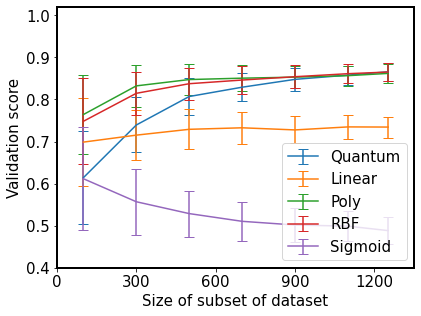

In [134]:
from matplotlib.ticker import MaxNLocator

quamtum_y_mean = []
quamtum_y_std = []
classical_y_mean = []
classical_y_std = []
score_list_classical = np.array(score_list_classical)
for dsize_inx, dsize in enumerate(total_data_size_list):
    full_data = score_list_precomputed[dsize_inx]
    quamtum_y_mean.append(full_data.mean())
    quamtum_y_std.append(full_data.std())
    classical_y_mean_local = []
    classical_y_std_local = []
    for kernel_idx, kernel in enumerate(classical_kernels):
        full_data = np.array(score_list_classical[dsize_inx])[:, kernel_idx]
        #full_data = score_list_classical[dsize_inx, :, kernel_idx]
        classical_y_mean_local.append(full_data.mean())
        classical_y_std_local.append(full_data.std())
    classical_y_mean.append(classical_y_mean_local)
    classical_y_std.append(classical_y_std_local)
classical_y_mean = np.array(classical_y_mean)
classical_y_std = np.array(classical_y_std)

ax = plt.figure(figsize=[6.4, 4.8]).gca()
plt.errorbar(total_data_size_list, quamtum_y_mean, yerr=quamtum_y_std, label='Quantum', markersize=8, capsize=5)
for kernel_idx, kernel in enumerate(classical_kernels_text):
    plt.errorbar(total_data_size_list, classical_y_mean[:, kernel_idx], yerr=classical_y_std[:, kernel_idx], label=kernel, markersize=8, capsize=5)

ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.xlabel('Size of subset of dataset')
plt.ylabel('Validation score')
plt.legend()
plt.xlim([0, 1350])
plt.ylim([0.4, 1.02])
plt.xticks([0, 300, 600, 900, 1200])
#plt.xticks(total_data_size_list)
plt.savefig('figs/Figure_supp_5.circular_8qubits_2_datasize_pca_last_validation.pdf', bbox_inches='tight', pad_inches=0)

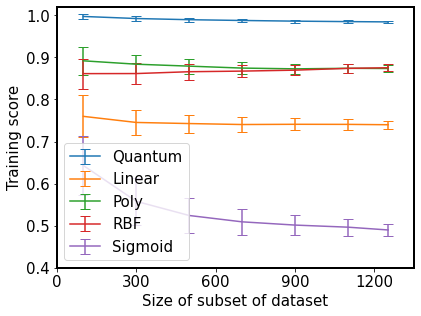

In [135]:
from matplotlib.ticker import MaxNLocator

quamtum_y_mean = []
quamtum_y_std = []
classical_y_mean = []
classical_y_std = []
score_train_list_classical = np.array(score_train_list_classical)
for dsize_inx, dsize in enumerate(total_data_size_list):
    full_data = score_train_list_precomputed[dsize_inx]
    quamtum_y_mean.append(full_data.mean())
    quamtum_y_std.append(full_data.std())
    classical_y_mean_local = []
    classical_y_std_local = []
    for kernel_idx, kernel in enumerate(classical_kernels):
        full_data = np.array(score_train_list_classical[dsize_inx])[:, kernel_idx]
        # full_data = score_train_list_classical[dsize_inx, :, kernel_idx]
        classical_y_mean_local.append(full_data.mean())
        classical_y_std_local.append(full_data.std())
    classical_y_mean.append(classical_y_mean_local)
    classical_y_std.append(classical_y_std_local)
classical_y_mean = np.array(classical_y_mean)
classical_y_std = np.array(classical_y_std)


ax = plt.figure(figsize=[6.4, 4.8]).gca()
plt.errorbar(total_data_size_list, quamtum_y_mean, yerr=quamtum_y_std, label='Quantum', markersize=8, capsize=5)
for kernel_idx, kernel in enumerate(classical_kernels_text):
    plt.errorbar(total_data_size_list, classical_y_mean[:, kernel_idx], yerr=classical_y_std[:, kernel_idx], label=kernel, markersize=8, capsize=5)

ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.xlabel('Size of subset of dataset')
plt.ylabel('Training score')
plt.legend()
plt.xlim([0, 1350])
plt.ylim([0.4, 1.02])
plt.xticks([0, 300, 600, 900, 1200])
#plt.xticks(total_data_size_list)
plt.savefig('figs/Figure_supp_5.circular_8qubits_2_datasize_pca_last_training.pdf', bbox_inches='tight', pad_inches=0)

# 4.1 Testing size of dataset (8 quitbs, circular, 1 reps, PCA last)

In [5]:
# Generate parameter list
pca_list = []
entanglement_list = []
reps_list = []
noise_list = []
total_data_size_list = []   # max = 1252
classical_kernels = ['linear', 'poly', 'rbf', 'sigmoid']
classical_kernels_text = ['Linear', 'Poly', 'RBF', 'Sigmoid']
nb_rand_sampling = 300
for pca_tmp in [8]:
    for entanglement_tmp in ['circular']:
        for reps_tmp in [1]:
            for noise_tmp in [0]:
                for total_data_size_tmp in [100, 300, 500, 700, 900, 1100, 1200, 1250]:
                    pca_list.append(pca_tmp)
                    entanglement_list.append(entanglement_tmp)
                    reps_list.append(reps_tmp)
                    noise_list.append(noise_tmp)
                    total_data_size_list.append(total_data_size_tmp)

In [ ]:
from qiskit import BasicAer
from warnings import filterwarnings
import random
filterwarnings('ignore')

#iter_list_precomputed = []
score_list_precomputed = []
score_train_list_precomputed = []
score_list_classical = []
score_train_list_classical = []
for para_inx in range(len(pca_list)):
    print(pca_list[para_inx], entanglement_list[para_inx], reps_list[para_inx], noise_list[para_inx], total_data_size_list[para_inx])
    
    score_list_precomputed_local = []
    score_train_list_precomputed_local = []
    score_list_classical_local = []
    score_train_list_classical_local = []
    # Randomly sample dataset
    for attemp_i in range(nb_rand_sampling):
        print('Sample', attemp_i)
        # Read data from csv file
        data=np.genfromtxt('alloy-property-avg.csv',delimiter=",",skip_header=1)

        # Randomly select dataset
        random.seed(attemp_i+1)
        rand_sel_list = np.random.choice(len(data), total_data_size_list[para_inx], replace=False)
        data = data[rand_sel_list]

        # Split as y for phase, X for other properties
        X,y=[],[]
        for i in range(len(data)):
            X.append(data[i][0:-1]), y.append(data[i][-1])

        # renormlaised all variables in X
        max_arr=np.max(X,axis=0)
        X=X/max_arr

        # Add random matrix (as white noise)
        X_noise=np.random.random((len(data),noise_list[para_inx]))
        Xnew=np.append(X, X_noise, axis=1)

        # Split dataset
        sample_train, sample_test, label_train, label_test = train_test_split(Xnew, y, test_size=0.2, random_state=22)

        # Reduce dimensions
        n_dim = pca_list[para_inx]
        pca = PCA(n_components=n_dim).fit(sample_train)
        sample_train = pca.transform(sample_train)
        sample_test = pca.transform(sample_test)

        # Normalise
        std_scale = StandardScaler().fit(sample_train)
        sample_train = std_scale.transform(sample_train)
        sample_test = std_scale.transform(sample_test)

        # Scale
        samples = np.append(sample_train, sample_test, axis=0)
        minmax_scale = MinMaxScaler((-1, 1)).fit(samples)
        sample_train = minmax_scale.transform(sample_train)
        sample_test = minmax_scale.transform(sample_test)

        # setup of kernel (quantum)
        encode_map = ZZFeatureMap(feature_dimension=pca_list[para_inx], reps=reps_list[para_inx], entanglement=entanglement_list[para_inx], insert_barriers=True)
        zz_kernel = QuantumKernel(feature_map=encode_map, quantum_instance=BasicAer.get_backend('statevector_simulator'))

        # pre-compute
        matrix_train = zz_kernel.evaluate(x_vec=sample_train)
        matrix_test = zz_kernel.evaluate(x_vec=sample_test, y_vec=sample_train)

        # Get max of iteration needed
        zzpc_svc = SVC(kernel='precomputed', max_iter=-1)
        zzpc_svc.fit(matrix_train, label_train)
        max_iter = zzpc_svc.n_iter_[0] + 100
        train_score = zzpc_svc.score(matrix_train, label_train)
        validation_score = zzpc_svc.score(matrix_test, label_test)
        score_list_precomputed_local.append(validation_score)
        score_train_list_precomputed_local.append(train_score)
        print('Take max_iter as ', max_iter)
        print('Score of validation', validation_score)
        print('Score of training', train_score)
        
        # Get score for classical kernals
        score_list_classical_local_local = []
        score_train_list_classical_local_local = []
        for kernel_idx, kernel in enumerate(classical_kernels):
            classical_svc = SVC(kernel=kernel, max_iter=-1)
            classical_svc.fit(sample_train, label_train)
            classical_score = classical_svc.score(sample_test, label_test)
            classical_train_score = classical_svc.score(sample_train, label_train)
            score_list_classical_local_local.append(classical_score)
            score_train_list_classical_local_local.append(classical_train_score)
        print('Score of validation (classical)', score_list_classical_local_local)
        print('Score of training (classical)', score_train_list_classical_local_local)
        score_list_classical_local.append(score_list_classical_local_local)
        score_train_list_classical_local.append(score_train_list_classical_local_local)
    score_list_precomputed.append(score_list_precomputed_local)
    score_train_list_precomputed.append(score_train_list_precomputed_local)
    score_list_classical.append(score_list_classical_local)
    score_train_list_classical.append(score_train_list_classical_local)
    

In [ ]:
# save results to file
if not os.path.exists('res/zz_4.1.npy'):
    with open('res/zz_4.1.npy', 'wb') as f:
        np.save(f, np.array(pca_list))
        np.save(f, np.array(entanglement_list))
        np.save(f, np.array(reps_list))
        np.save(f, np.array(noise_list))
        np.save(f, np.array(total_data_size_list))
        np.save(f, np.array(score_list_precomputed))
        np.save(f, np.array(score_train_list_precomputed))
        np.save(f, np.array(score_list_classical))
        np.save(f, np.array(score_train_list_classical))

In [52]:
# ___not_used_old_read_______
with open('res/zz_4.1.npy', 'rb') as f:
    pca_list = np.load(f)
    entanglement_list = np.load(f)
    reps_list = np.load(f)
    noise_list = np.load(f)
    total_data_size_list = np.load(f)
    score_list_precomputed = np.load(f, allow_pickle=True)
    score_train_list_precomputed = np.load(f, allow_pickle=True)
    score_list_classical = np.load(f, allow_pickle=True)
    score_train_list_classical = np.load(f, allow_pickle=True)

In [34]:
# New read of results file from run_4_split.sh
noise_list = []
pca_list = []
entanglement_list = []
reps_list = []
noise_list = []
total_data_size_list = []
score_list_precomputed = []
score_train_list_precomputed = []
score_list_classical = []
score_train_list_classical = []
#for file_id in [100, 300, 500, 700, 900, 1100, 1250, 1252]:
for file_id in [100, 300, 500, 700, 900, 1100, 1252]:
    filename = 'res/zz_4.1_' + str(file_id) + '.npy'
    with open(filename, 'rb') as f:
        pca_list.append(np.load(f))
        entanglement_list.append(np.load(f))
        reps_list.append(np.load(f))
        noise_list.append(np.load(f))
        total_data_size_list.append(np.load(f, allow_pickle=True))
        score_list_precomputed.append(np.load(f, allow_pickle=True))
        score_train_list_precomputed.append(np.load(f, allow_pickle=True))
        score_list_classical.append(np.load(f, allow_pickle=True))
        score_train_list_classical.append(np.load(f, allow_pickle=True))

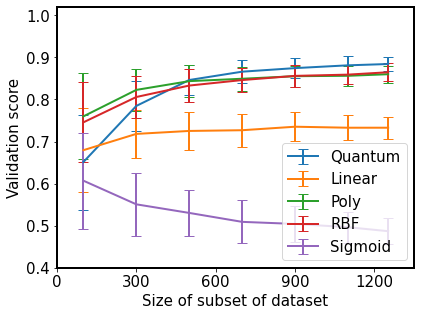

In [35]:
from matplotlib.ticker import MaxNLocator

quamtum_y_mean = []
quamtum_y_std = []
classical_y_mean = []
classical_y_std = []
score_list_classical = np.array(score_list_classical)
for dsize_inx, dsize in enumerate(total_data_size_list):
    full_data = score_list_precomputed[dsize_inx]
    quamtum_y_mean.append(full_data.mean())
    quamtum_y_std.append(full_data.std())
    classical_y_mean_local = []
    classical_y_std_local = []
    for kernel_idx, kernel in enumerate(classical_kernels):
        full_data = np.array(score_list_classical[dsize_inx])[:, kernel_idx]
        #full_data = score_list_classical[dsize_inx, :, kernel_idx]
        classical_y_mean_local.append(full_data.mean())
        classical_y_std_local.append(full_data.std())
    classical_y_mean.append(classical_y_mean_local)
    classical_y_std.append(classical_y_std_local)
classical_y_mean = np.array(classical_y_mean)
classical_y_std = np.array(classical_y_std)

ax = plt.figure(figsize=[6.4, 4.8]).gca()
plt.errorbar(total_data_size_list, quamtum_y_mean, yerr=quamtum_y_std, label='Quantum', markersize=8, capsize=5, linewidth=2)
for kernel_idx, kernel in enumerate(classical_kernels_text):
    plt.errorbar(total_data_size_list, classical_y_mean[:, kernel_idx], yerr=classical_y_std[:, kernel_idx], label=kernel, markersize=8, capsize=5, linewidth=2)

ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.xlabel('Size of subset of dataset')
plt.ylabel('Validation score')
plt.legend()
plt.xlim([0, 1350])
plt.ylim([0.4, 1.02])
plt.xticks([0, 300, 600, 900, 1200])
#plt.xticks(total_data_size_list)
plt.savefig('figs/Figure_supp_5.circular_8qubits_1_datasize_pca_last_validation.pdf', bbox_inches='tight', pad_inches=0)

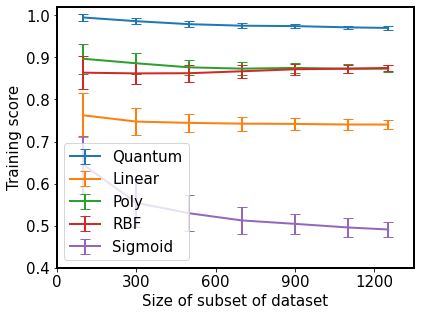

In [36]:
from matplotlib.ticker import MaxNLocator

quamtum_y_mean = []
quamtum_y_std = []
classical_y_mean = []
classical_y_std = []
score_train_list_classical = np.array(score_train_list_classical)
for dsize_inx, dsize in enumerate(total_data_size_list):
    full_data = score_train_list_precomputed[dsize_inx]
    quamtum_y_mean.append(full_data.mean())
    quamtum_y_std.append(full_data.std())
    classical_y_mean_local = []
    classical_y_std_local = []
    for kernel_idx, kernel in enumerate(classical_kernels):
        full_data = np.array(score_train_list_classical[dsize_inx])[:, kernel_idx]
        # full_data = score_train_list_classical[dsize_inx, :, kernel_idx]
        classical_y_mean_local.append(full_data.mean())
        classical_y_std_local.append(full_data.std())
    classical_y_mean.append(classical_y_mean_local)
    classical_y_std.append(classical_y_std_local)
classical_y_mean = np.array(classical_y_mean)
classical_y_std = np.array(classical_y_std)


ax = plt.figure(figsize=[6.4, 4.8]).gca()
plt.errorbar(total_data_size_list, quamtum_y_mean, yerr=quamtum_y_std, label='Quantum', markersize=8, capsize=5, linewidth=2)
for kernel_idx, kernel in enumerate(classical_kernels_text):
    plt.errorbar(total_data_size_list, classical_y_mean[:, kernel_idx], yerr=classical_y_std[:, kernel_idx], label=kernel, markersize=8, capsize=5, linewidth=2)

ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.xlabel('Size of subset of dataset')
plt.ylabel('Training score')
plt.legend()
plt.xlim([0, 1350])
plt.ylim([0.4, 1.02])
plt.xticks([0, 300, 600, 900, 1200])
#plt.xticks(total_data_size_list)
plt.savefig('figs/Figure_supp_5.circular_8qubits_1_datasize_pca_last_training.pdf', bbox_inches='tight', pad_inches=0)

# 5. Testing size of dataset (8 quitbs, circular, 2 reps, PCA first)

In [5]:
# Generate parameter list
pca_list = []
entanglement_list = []
reps_list = []
noise_list = []
total_data_size_list = []   # max = 1252
classical_kernels = ['linear', 'poly', 'rbf', 'sigmoid']
nb_rand_sampling = 300
for pca_tmp in [8]:
    for entanglement_tmp in ['circular']:
        for reps_tmp in [2]:
            for noise_tmp in [0]:
                for total_data_size_tmp in [100, 300, 500, 700, 900, 1100, 1200, 1250]:
                    pca_list.append(pca_tmp)
                    entanglement_list.append(entanglement_tmp)
                    reps_list.append(reps_tmp)
                    noise_list.append(noise_tmp)
                    total_data_size_list.append(total_data_size_tmp)

In [ ]:
from qiskit import BasicAer
from warnings import filterwarnings
import random
filterwarnings('ignore')

#iter_list_precomputed = []
score_list_precomputed = []
score_train_list_precomputed = []
score_list_classical = []
score_train_list_classical = []
for para_inx in range(len(pca_list)):
    print(pca_list[para_inx], entanglement_list[para_inx], reps_list[para_inx], noise_list[para_inx], total_data_size_list[para_inx])
    
    score_list_precomputed_local = []
    score_train_list_precomputed_local = []
    score_list_classical_local = []
    score_train_list_classical_local = []
    # Randomly sample dataset
    for attemp_i in range(nb_rand_sampling):
        print('Sample', attemp_i)
        # Read data from csv file
        data=np.genfromtxt('alloy-property-avg.csv',delimiter=",",skip_header=1)

        # Split as y for phase, X for other properties
        X,y=[],[]
        for i in range(len(data)):
            X.append(data[i][0:-1]), y.append(data[i][-1])

        # renormlaised all variables in X
        max_arr=np.max(X,axis=0)
        X=X/max_arr

        # Add random matrix (as white noise)
        X_noise=np.random.random((len(data),noise_list[para_inx]))
        Xnew=np.append(X, X_noise, axis=1)

        # Split dataset
        sample_train, sample_test, label_train, label_test = train_test_split(Xnew, y, test_size=0.2, random_state=22)

        # Reduce dimensions
        n_dim = pca_list[para_inx]
        pca = PCA(n_components=n_dim).fit(sample_train)
        sample_train = pca.transform(sample_train)
        sample_test = pca.transform(sample_test)
        
        # Randomly select dataset
        random.seed(attemp_i+1)
        test_size = int(total_data_size_list[para_inx] * 0.2)
        train_size = total_data_size_list[para_inx] - test_size
        rand_sel_list_1 = np.random.choice(len(sample_train), train_size, replace=False)
        rand_sel_list_2 = np.random.choice(len(sample_test), test_size, replace=False)        
        sample_train = sample_train[rand_sel_list_1]
        sample_test = sample_test[rand_sel_list_2]
        label_train = np.array(label_train)[rand_sel_list_1]
        label_test = np.array(label_test)[rand_sel_list_2]

        # Normalise
        std_scale = StandardScaler().fit(sample_train)
        sample_train = std_scale.transform(sample_train)
        sample_test = std_scale.transform(sample_test)

        # Scale
        samples = np.append(sample_train, sample_test, axis=0)
        minmax_scale = MinMaxScaler((-1, 1)).fit(samples)
        sample_train = minmax_scale.transform(sample_train)
        sample_test = minmax_scale.transform(sample_test)

        # setup of kernel
        encode_map = ZZFeatureMap(feature_dimension=pca_list[para_inx], reps=reps_list[para_inx], entanglement=entanglement_list[para_inx], insert_barriers=True)
        zz_kernel = QuantumKernel(feature_map=encode_map, quantum_instance=BasicAer.get_backend('statevector_simulator'))

        # pre-compute
        matrix_train = zz_kernel.evaluate(x_vec=sample_train)
        matrix_test = zz_kernel.evaluate(x_vec=sample_test, y_vec=sample_train)

        # Get max of iteration needed
        zzpc_svc = SVC(kernel='precomputed', max_iter=-1)
        zzpc_svc.fit(matrix_train, label_train)
        max_iter = zzpc_svc.n_iter_[0] + 100
        train_score = zzpc_svc.score(matrix_train, label_train)
        validation_score = zzpc_svc.score(matrix_test, label_test)
        score_list_precomputed_local.append(validation_score)
        score_train_list_precomputed_local.append(train_score)
        print('Take max_iter as ', max_iter)
        print('Score of validation', validation_score)
        print('Score of training', train_score)
        
        # Get score for classical kernals
        score_list_classical_local_local = []
        score_train_list_classical_local_local = []
        for kernel_idx, kernel in enumerate(classical_kernels):
            classical_svc = SVC(kernel=kernel, max_iter=-1)
            classical_svc.fit(sample_train, label_train)
            classical_score = classical_svc.score(sample_test, label_test)
            classical_train_score = classical_svc.score(sample_train, label_train)
            score_list_classical_local_local.append(classical_score)
            score_train_list_classical_local_local.append(classical_train_score)
        print('Score of validation (classical)', score_list_classical_local_local)
        print('Score of training (classical)', score_train_list_classical_local_local)
        score_list_classical_local.append(score_list_classical_local_local)
        score_train_list_classical_local.append(score_train_list_classical_local_local)
    score_list_precomputed.append(score_list_precomputed_local)
    score_train_list_precomputed.append(score_train_list_precomputed_local)
    score_list_classical.append(score_list_classical_local)
    score_train_list_classical.append(score_train_list_classical_local)

8 circular 2 0 100
Sample 0
Take max_iter as  232
Score of validation 0.65
Score of training 1.0
Score of validation (classical) [0.7, 0.85, 0.8, 0.65]
Score of training (classical) [0.7625, 0.8625, 0.8375, 0.5875]
Sample 1
Take max_iter as  198
Score of validation 0.7
Score of training 1.0
Score of validation (classical) [0.7, 0.75, 0.75, 0.75]
Score of training (classical) [0.7875, 0.95, 0.9125, 0.525]
Sample 2
Take max_iter as  211
Score of validation 0.65
Score of training 1.0
Score of validation (classical) [0.85, 0.85, 0.9, 0.7]
Score of training (classical) [0.7375, 0.875, 0.8375, 0.5625]
Sample 3
Take max_iter as  205
Score of validation 0.75
Score of training 1.0
Score of validation (classical) [0.7, 0.7, 0.75, 0.55]
Score of training (classical) [0.8, 0.825, 0.8, 0.725]
Sample 4
Take max_iter as  214
Score of validation 0.85
Score of training 1.0
Score of validation (classical) [0.6, 0.65, 0.65, 0.6]
Score of training (classical) [0.775, 0.85, 0.85, 0.75]
Sample 5
Take max_it

In [ ]:
# save results to file
if not os.path.exists('res/zz_5.npy'):
    with open('res/zz_5.npy', 'wb') as f:
        np.save(f, np.array(pca_list))
        np.save(f, np.array(entanglement_list))
        np.save(f, np.array(reps_list))
        np.save(f, np.array(noise_list))
        np.save(f, np.array(total_data_size_list))
        np.save(f, np.array(score_list_precomputed))
        np.save(f, np.array(score_train_list_precomputed))
        np.save(f, np.array(score_list_classical))
        np.save(f, np.array(score_train_list_classical))

In [108]:
# ___not_used_old_read_______
with open('res/zz_5.npy', 'rb') as f:
    pca_list = np.load(f)
    entanglement_list = np.load(f)
    reps_list = np.load(f)
    noise_list = np.load(f)
    total_data_size_list = np.load(f)
    score_list_precomputed = np.load(f, allow_pickle=True)
    score_train_list_precomputed = np.load(f, allow_pickle=True)
    score_list_classical = np.load(f, allow_pickle=True)
    score_train_list_classical = np.load(f, allow_pickle=True)

In [136]:
# New read of results file from run_5_split.sh
noise_list = []
pca_list = []
entanglement_list = []
reps_list = []
noise_list = []
total_data_size_list = []
score_list_precomputed = []
score_train_list_precomputed = []
score_list_classical = []
score_train_list_classical = []
#for file_id in [100, 300, 500, 700, 900, 1100, 1250, 1252]:
for file_id in [100, 300, 500, 700, 900, 1100, 1250]:
    filename = 'res/zz_5_' + str(file_id) + '.npy'
    with open(filename, 'rb') as f:
        pca_list.append(np.load(f))
        entanglement_list.append(np.load(f))
        reps_list.append(np.load(f))
        noise_list.append(np.load(f))
        total_data_size_list.append(np.load(f, allow_pickle=True))
        score_list_precomputed.append(np.load(f, allow_pickle=True))
        score_train_list_precomputed.append(np.load(f, allow_pickle=True))
        score_list_classical.append(np.load(f, allow_pickle=True))
        score_train_list_classical.append(np.load(f, allow_pickle=True))

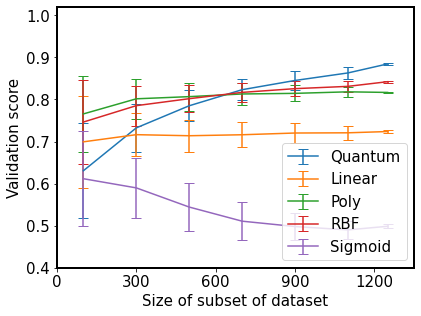

In [137]:
from matplotlib.ticker import MaxNLocator

quamtum_y_mean = []
quamtum_y_std = []
classical_y_mean = []
classical_y_std = []
score_list_classical = np.array(score_list_classical)
for dsize_inx, dsize in enumerate(total_data_size_list):
    full_data = score_list_precomputed[dsize_inx]
    quamtum_y_mean.append(full_data.mean())
    quamtum_y_std.append(full_data.std())
    classical_y_mean_local = []
    classical_y_std_local = []
    for kernel_idx, kernel in enumerate(classical_kernels):
        full_data = np.array(score_list_classical[dsize_inx])[:, kernel_idx]
        #full_data = score_list_classical[dsize_inx, :, kernel_idx]
        classical_y_mean_local.append(full_data.mean())
        classical_y_std_local.append(full_data.std())
    classical_y_mean.append(classical_y_mean_local)
    classical_y_std.append(classical_y_std_local)
classical_y_mean = np.array(classical_y_mean)
classical_y_std = np.array(classical_y_std)

ax = plt.figure(figsize=[6.4, 4.8]).gca()
plt.errorbar(total_data_size_list, quamtum_y_mean, yerr=quamtum_y_std, label='Quantum', markersize=8, capsize=5)
for kernel_idx, kernel in enumerate(classical_kernels_text):
    plt.errorbar(total_data_size_list, classical_y_mean[:, kernel_idx], yerr=classical_y_std[:, kernel_idx], label=kernel, markersize=8, capsize=5)

ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.xlabel('Size of subset of dataset')
plt.ylabel('Validation score')
plt.legend()
plt.xlim([0, 1350])
plt.ylim([0.4, 1.02])
plt.xticks([0, 300, 600, 900, 1200])
#plt.xticks(total_data_size_list)
plt.savefig('figs/Figure_supp_5.circular_8qubits_2_datasize_pca_first_validation.pdf', bbox_inches='tight', pad_inches=0)

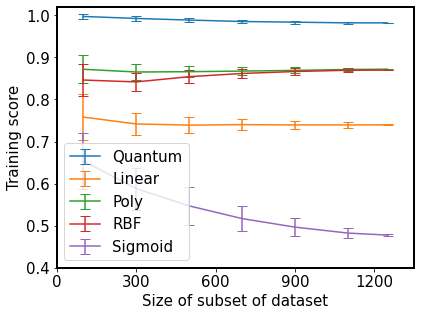

In [138]:
from matplotlib.ticker import MaxNLocator

quamtum_y_mean = []
quamtum_y_std = []
classical_y_mean = []
classical_y_std = []
score_train_list_classical = np.array(score_train_list_classical)
for dsize_inx, dsize in enumerate(total_data_size_list):
    full_data = score_train_list_precomputed[dsize_inx]
    quamtum_y_mean.append(full_data.mean())
    quamtum_y_std.append(full_data.std())
    classical_y_mean_local = []
    classical_y_std_local = []
    for kernel_idx, kernel in enumerate(classical_kernels):
        full_data = np.array(score_train_list_classical[dsize_inx])[:, kernel_idx]
        # full_data = score_train_list_classical[dsize_inx, :, kernel_idx]
        classical_y_mean_local.append(full_data.mean())
        classical_y_std_local.append(full_data.std())
    classical_y_mean.append(classical_y_mean_local)
    classical_y_std.append(classical_y_std_local)
classical_y_mean = np.array(classical_y_mean)
classical_y_std = np.array(classical_y_std)


ax = plt.figure(figsize=[6.4, 4.8]).gca()
plt.errorbar(total_data_size_list, quamtum_y_mean, yerr=quamtum_y_std, label='Quantum', markersize=8, capsize=5)
for kernel_idx, kernel in enumerate(classical_kernels_text):
    plt.errorbar(total_data_size_list, classical_y_mean[:, kernel_idx], yerr=classical_y_std[:, kernel_idx], label=kernel, markersize=8, capsize=5)

ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.xlabel('Size of subset of dataset')
plt.ylabel('Training score')
plt.legend()
plt.xlim([0, 1350])
plt.ylim([0.4, 1.02])
plt.xticks([0, 300, 600, 900, 1200])
#plt.xticks(total_data_size_list)
plt.savefig('figs/Figure_supp_5.circular_8qubits_2_datasize_pca_first_training.pdf', bbox_inches='tight', pad_inches=0)

# 6 Testing ZFeatureMap (8 quitbs, circular, 1 reps), error bar from split of dataset

In [6]:
# Generate parameter list
pca_list = []
entanglement_list = []
reps_list = []
noise_list = []
classical_kernels = ['linear', 'poly', 'rbf', 'sigmoid']
classical_kernels_text = ['Linear', 'Poly', 'RBF', 'Sigmoid']
for pca_tmp in [8]:
    for entanglement_tmp in ['circular']:
        for reps_tmp in [1]:
            for noise_tmp in [0]:
                pca_list.append(pca_tmp)
                entanglement_list.append(entanglement_tmp)
                reps_list.append(reps_tmp)
                noise_list.append(noise_tmp)

In [ ]:
from qiskit import BasicAer
from warnings import filterwarnings
filterwarnings('ignore')

iter_list_precomputed = []
score_list_precomputed = []
score_train_list_precomputed = []
score_list_classical = []
score_train_list_classical = []
nb_rand_sampling = 300
for para_inx in range(len(pca_list)):
    print(pca_list[para_inx], entanglement_list[para_inx], reps_list[para_inx], noise_list[para_inx])
    # Randomly sample dataset
    iter_list_precomputed_local = []
    score_list_precomputed_local = []
    score_train_list_precomputed_local = []
    score_list_classical_local = []
    score_train_list_classical_local = []
    for attemp_i in range(nb_rand_sampling):
        # Load digits dataset
        data=np.genfromtxt('alloy-property-avg.csv',delimiter=",",skip_header=1)

        # Split as y for phase, X for other properties
        X,y=[],[]
        for i in range(len(data)):
            X.append(data[i][0:-1]), y.append(data[i][-1])

        # renormlaised all variables in X
        max_arr=np.max(X,axis=0)
        X=X/max_arr

        # Split dataset
        sample_train, sample_test, label_train, label_test = train_test_split(X, y, test_size=0.2, random_state=22+attemp_i)

        # Reduce dimensions
        n_dim = pca_list[para_inx]
        pca = PCA(n_components=n_dim).fit(sample_train)
        sample_train = pca.transform(sample_train)
        sample_test = pca.transform(sample_test)

        # Normalise
        std_scale = StandardScaler().fit(sample_train)
        sample_train = std_scale.transform(sample_train)
        sample_test = std_scale.transform(sample_test)

        # Scale
        samples = np.append(sample_train, sample_test, axis=0)
        minmax_scale = MinMaxScaler((-1, 1)).fit(samples)
        sample_train = minmax_scale.transform(sample_train)
        sample_test = minmax_scale.transform(sample_test)

        # setup of kernel
        #encode_map = ZFeatureMap(feature_dimension=pca_list[para_inx], reps=reps_list[para_inx], entanglement=entanglement_list[para_inx], insert_barriers=True)
        encode_map = ZFeatureMap(feature_dimension=pca_list[para_inx], reps=reps_list[para_inx], insert_barriers=True)
        zz_kernel = QuantumKernel(feature_map=encode_map, quantum_instance=BasicAer.get_backend('statevector_simulator'))

        # pre-compute
        matrix_train = zz_kernel.evaluate(x_vec=sample_train)
        matrix_test = zz_kernel.evaluate(x_vec=sample_test, y_vec=sample_train)

        # Get max of iteration needed
        zzpc_svc = SVC(kernel='precomputed', max_iter=-1)
        zzpc_svc.fit(matrix_train, label_train)
        # max_iter = zzpc_svc.n_iter_[0] + 100
        train_score = zzpc_svc.score(matrix_train, label_train)
        validation_score = zzpc_svc.score(matrix_test, label_test)
        score_list_precomputed_local.append(validation_score)
        score_train_list_precomputed_local.append(train_score)
        print('Attempt ', attemp_i)
        # print('Take max_iter as ', max_iter)
        print('Score of validation', validation_score)
        print('Score of training', train_score)

        # Get score for classical kernals
        score_list_classical_local_local = []
        score_train_list_classical_local_local = []
        for kernel_idx, kernel in enumerate(classical_kernels):
            classical_svc = SVC(kernel=kernel, max_iter=-1)
            classical_svc.fit(sample_train, label_train)
            classical_score = classical_svc.score(sample_test, label_test)
            classical_train_score = classical_svc.score(sample_train, label_train)
            score_list_classical_local_local.append(classical_score)
            score_train_list_classical_local_local.append(classical_train_score)
        print('Score of validation (classical)', score_list_classical_local_local)
        print('Score of training (classical)', score_train_list_classical_local_local)
        score_list_classical_local.append(score_list_classical_local_local)
        score_train_list_classical_local.append(score_train_list_classical_local_local)
        
    score_list_precomputed.append(score_list_precomputed_local)
    score_train_list_precomputed.append(score_train_list_precomputed_local)
    score_list_classical.append(score_list_classical_local)
    score_train_list_classical.append(score_train_list_classical_local)

In [11]:
# save results to file
if not os.path.exists('res/zz_6.npy'):
    with open('res/zz_6.npy', 'wb') as f:
        np.save(f, np.array(pca_list))
        np.save(f, np.array(entanglement_list))
        np.save(f, np.array(reps_list))
        np.save(f, np.array(noise_list))
        np.save(f, np.array(score_list_precomputed))
        np.save(f, np.array(score_train_list_precomputed))

In [12]:
# Read saved results
with open('res/zz_6.npy', 'rb') as f:
    pca_list = np.load(f)
    entanglement_list = np.load(f)
    reps_list = np.load(f)
    noise_list = np.load(f)
    score_list_precomputed = np.load(f, allow_pickle=True)
    score_train_list_precomputed = np.load(f, allow_pickle=True)
    score_list_classical = np.load(f, allow_pickle=True)
    score_train_list_classical = np.load(f, allow_pickle=True)

In [20]:
print('Training score mean:', np.mean(score_train_list_precomputed), ', std:', np.std(score_train_list_precomputed))
print('Validation score mean:', np.mean(score_list_precomputed), ', std:', np.std(score_list_precomputed))

Training score mean: 0.8753946053946053 , std: 0.007835023723782343
Validation score mean: 0.8627224435590968 , std: 0.021287029020456108


# 7 Testing ZZFeatureMap (8/6 quitbs, circular/linear/none, 1 reps), error bar from split of dataset

In [3]:
# Place holder --> not needed currently
# Generate parameter list
pca_list = [8, 8, 8, 6, 6, 6]
entanglement_list = ['linear', 'circular', 'none', 'linear', 'circular', 'none']
reps_list = [1, 1, 1, 2, 2, 2]
noise_list = [0, 0, 0, 0, 0, 0]
classical_kernels = ['linear', 'poly', 'rbf', 'sigmoid']
classical_kernels_text = ['Linear', 'Poly', 'RBF', 'Sigmoid']

In [ ]:
from qiskit import BasicAer
from warnings import filterwarnings
filterwarnings('ignore')

score_list_precomputed = []
score_train_list_precomputed = []
score_list_classical = []
score_train_list_classical = []
nb_rand_sampling = 300
for para_inx in range(len(pca_list)):
    print(pca_list[para_inx], entanglement_list[para_inx], reps_list[para_inx], noise_list[para_inx])
    # Randomly sample dataset
    iter_list_precomputed_local = []
    score_list_precomputed_local = []
    score_train_list_precomputed_local = []
    score_list_classical_local = []
    score_train_list_classical_local = []
    for attemp_i in range(nb_rand_sampling):
        # Load digits dataset
        data=np.genfromtxt('alloy-property-avg.csv',delimiter=",",skip_header=1)

        # Split as y for phase, X for other properties
        X,y=[],[]
        for i in range(len(data)):
            X.append(data[i][0:-1]), y.append(data[i][-1])

        # renormlaised all variables in X
        max_arr=np.max(X,axis=0)
        X=X/max_arr

        # Split dataset
        sample_train, sample_test, label_train, label_test = train_test_split(X, y, test_size=0.2, random_state=22+attemp_i)

        # Reduce dimensions
        n_dim = pca_list[para_inx]
        pca = PCA(n_components=n_dim).fit(sample_train)
        sample_train = pca.transform(sample_train)
        sample_test = pca.transform(sample_test)

        # Normalise
        std_scale = StandardScaler().fit(sample_train)
        sample_train = std_scale.transform(sample_train)
        sample_test = std_scale.transform(sample_test)

        # Scale
        samples = np.append(sample_train, sample_test, axis=0)
        minmax_scale = MinMaxScaler((-1, 1)).fit(samples)
        sample_train = minmax_scale.transform(sample_train)
        sample_test = minmax_scale.transform(sample_test)

        # setup of kernel
        #encode_map = ZFeatureMap(feature_dimension=pca_list[para_inx], reps=reps_list[para_inx], entanglement=entanglement_list[para_inx], insert_barriers=True)
        encode_map = ZFeatureMap(feature_dimension=pca_list[para_inx], reps=reps_list[para_inx], insert_barriers=True)
        zz_kernel = QuantumKernel(feature_map=encode_map, quantum_instance=BasicAer.get_backend('statevector_simulator'))

        # pre-compute
        matrix_train = zz_kernel.evaluate(x_vec=sample_train)
        matrix_test = zz_kernel.evaluate(x_vec=sample_test, y_vec=sample_train)

        # Get max of iteration needed
        zzpc_svc = SVC(kernel='precomputed', max_iter=-1)
        zzpc_svc.fit(matrix_train, label_train)
        # max_iter = zzpc_svc.n_iter_[0] + 100
        train_score = zzpc_svc.score(matrix_train, label_train)
        validation_score = zzpc_svc.score(matrix_test, label_test)
        score_list_precomputed_local.append(validation_score)
        score_train_list_precomputed_local.append(train_score)
        print('Attempt ', attemp_i)
        # print('Take max_iter as ', max_iter)
        print('Score of validation', validation_score)
        print('Score of training', train_score)
        
    score_list_precomputed.append(score_list_precomputed_local)
    score_train_list_precomputed.append(score_train_list_precomputed_local)
    score_list_classical.append(score_list_classical_local)
    score_train_list_classical.append(score_train_list_classical_local)

In [5]:
# New read of results file from run_7_split.sh
noise_list = []
pca_list = []
entanglement_list = []
reps_list = []
noise_list = []
score_list_precomputed = []
score_train_list_precomputed = []
for file_id in [0, 1, 2, 3, 4, 5]:
    filename = 'res/zz_7_' + str(file_id) + '.npy'
    with open(filename, 'rb') as f:
        pca_list.append(np.load(f))
        entanglement_list.append(np.load(f))
        reps_list.append(np.load(f))
        noise_list.append(np.load(f))
        score_list_precomputed.append(np.load(f, allow_pickle=True))
        score_train_list_precomputed.append(np.load(f, allow_pickle=True))

FileNotFoundError: [Errno 2] No such file or directory: 'res/zz_7_2.npy'

In [ ]:
df = pd.DataFrame(list(zip(pca_list, entanglement_list, to_csv_mean, to_csv_std)),
               columns =['Qubits', 'Kernel', 'Score_mean', 'Score_std'])
df.to_csv('Figure_3.circular_8qubits_1_pca_test_validation.csv', index=False)

# Classical kernels

In [12]:
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')
classical_kernels = ['linear', 'poly', 'rbf', 'sigmoid']
#classical_kernels = ['linear', 'poly']
iter_list_classical = []
score_list_classical = []

# Get max iteration needed for each case
max_iter_each_case = []
for kernel_inx, kernel in enumerate(classical_kernels):
    classical_svc = SVC(kernel=kernel, max_iter=-1)
    classical_svc.fit(sample_train, label_train)
    classical_score = classical_svc.score(sample_test, label_test)
    max_iter_each_case.append(classical_svc.n_iter_[0])
    print(kernel + ', iteration_needed:' + str(int(classical_svc.n_iter_[0])))
    
max_iter = np.max(max_iter_each_case) + 100
print('Max_iteration_taken = ' + str(max_iter))

for kernel_inx, kernel in enumerate(classical_kernels):
    iter_list_classical_local = []
    score_list_classical_local = []
    for nb_iter in range(max_iter):
        classical_svc = SVC(kernel=kernel, max_iter=nb_iter)
        classical_svc.fit(sample_train, label_train)
        classical_score = classical_svc.score(sample_test, label_test)
        iter_list_classical_local.append(nb_iter)
        score_list_classical_local.append(classical_score)
        if nb_iter % 100 == 0:
            print(kernel, nb_iter)
    iter_list_classical.append(iter_list_classical_local)
    score_list_classical.append(score_list_classical_local)
# print('%s kernel classification test score:  %0.2f' % (kernel, classical_score))

linear, iteration_needed:1182
poly, iteration_needed:1395
rbf, iteration_needed:506
sigmoid, iteration_needed:447
Max_iteration_taken = 1495
linear 0
linear 100
linear 200
linear 300
linear 400
linear 500
linear 600
linear 700
linear 800
linear 900
linear 1000
linear 1100
linear 1200
linear 1300
linear 1400
poly 0
poly 100
poly 200
poly 300
poly 400
poly 500
poly 600
poly 700
poly 800
poly 900
poly 1000
poly 1100
poly 1200
poly 1300
poly 1400
rbf 0
rbf 100
rbf 200
rbf 300
rbf 400
rbf 500
rbf 600
rbf 700
rbf 800
rbf 900
rbf 1000
rbf 1100
rbf 1200
rbf 1300
rbf 1400
sigmoid 0
sigmoid 100
sigmoid 200
sigmoid 300
sigmoid 400
sigmoid 500
sigmoid 600
sigmoid 700
sigmoid 800
sigmoid 900
sigmoid 1000
sigmoid 1100
sigmoid 1200
sigmoid 1300
sigmoid 1400


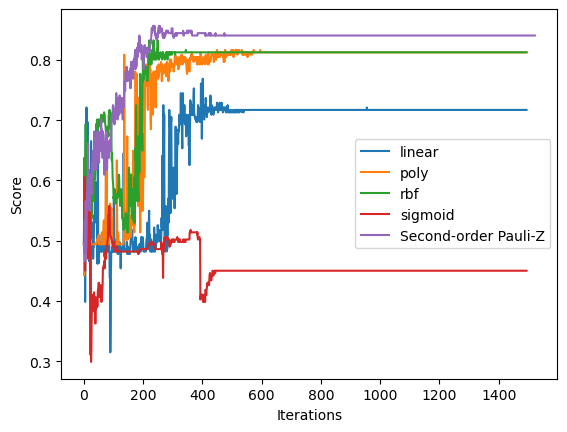

In [13]:
for kernel_inx, kernel in enumerate(classical_kernels):
    plt.plot(iter_list_classical[kernel_inx], score_list_classical[kernel_inx], label=kernel)

plt.plot(iter_list_precomputed, score_list_precomputed, label='Second-order Pauli-Z')

plt.xlabel('Iterations')
plt.ylabel('Score')
plt.legend()

# TwoLocal part

In [5]:
from qiskit import BasicAer
zz_map = TwoLocal(num_qubits=2, reps=2, rotation_blocks=['ry','rz'], 
               entanglement_blocks='cx', entanglement='circular', insert_barriers=True)
zz_kernel = QuantumKernel(feature_map=zz_map, quantum_instance=BasicAer.get_backend('statevector_simulator'))

In [8]:
# to get how many iteration for converged runs
zzcb_svc.n_iter_

array([646], dtype=int32)

In [ ]:
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')

iter_list_qm = []
score_list_qm = []
for nb_iter in range(700):
    zzcb_svc = SVC(kernel=zz_kernel.evaluate, max_iter=nb_iter)
    zzcb_svc.fit(sample_train, label_train)
    zzcb_score = zzcb_svc.score(sample_test, label_test)
    iter_list_qm.append(nb_iter)
    score_list_qm.append(zzcb_score)
    print(f'Callable kernel classification test score: {zzcb_score}', nb_iter)
plt.plot(iter_list_qm, score_list_qm)
plt.xlabel('Iterations')
plt.ylabel('Score')


Callable kernel classification test score: 0.4940239043824701 0
Callable kernel classification test score: 0.49800796812749004 1
Callable kernel classification test score: 0.5219123505976095 2
Callable kernel classification test score: 0.50199203187251 3


Text(0, 0.5, 'Score')

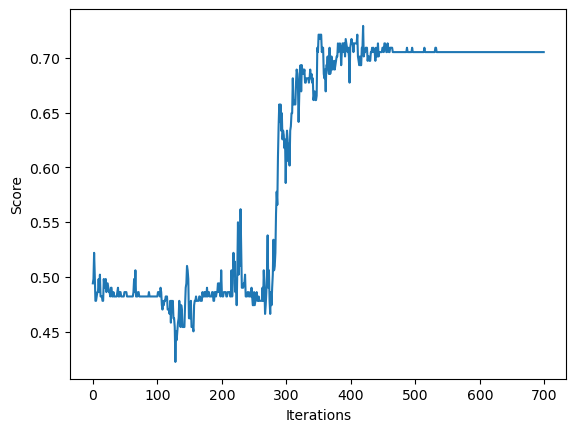

In [12]:
plt.plot(iter_list_qm, score_list_qm)
plt.xlabel('Iterations')
plt.ylabel('Score')

# Pre-computed of TwoLocal part

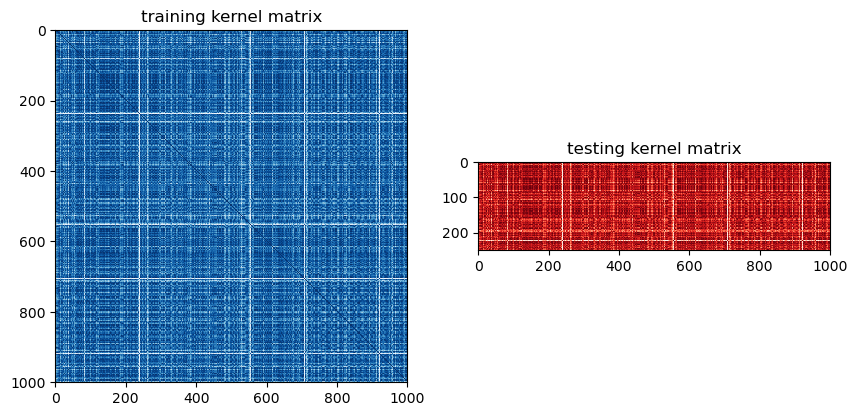

In [15]:
matrix_train = zz_kernel.evaluate(x_vec=sample_train)
matrix_test = zz_kernel.evaluate(x_vec=sample_test, y_vec=sample_train)

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(np.asmatrix(matrix_train),
              interpolation='nearest', origin='upper', cmap='Blues')
axs[0].set_title("training kernel matrix")
axs[1].imshow(np.asmatrix(matrix_test),
              interpolation='nearest', origin='upper', cmap='Reds')
axs[1].set_title("testing kernel matrix")
plt.show()

Text(0, 0.5, 'Score')

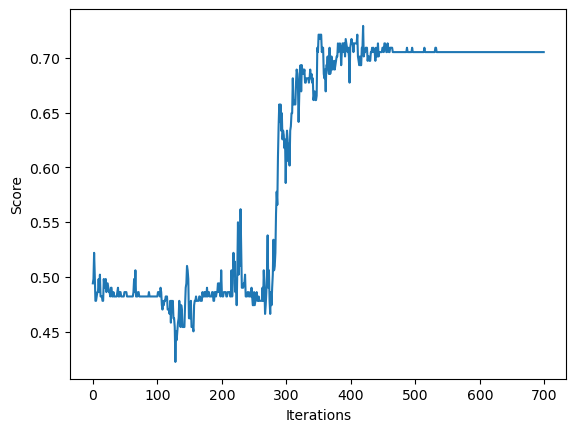

In [17]:
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')

iter_list_precomputed = []
score_list_precomputed = []
for nb_iter in range(700):
    zzpc_svc = SVC(kernel='precomputed', max_iter=nb_iter)
    zzpc_svc.fit(matrix_train, label_train)
    zzpc_score = zzpc_svc.score(matrix_test, label_test)
    iter_list_precomputed.append(nb_iter)
    score_list_precomputed.append(zzpc_score)
    # print(f'Precomputed kernel classification test score: {zzpc_score}')
plt.plot(iter_list_precomputed, score_list_precomputed)
plt.xlabel('Iterations')
plt.ylabel('Score')